In [1]:
#load package
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(data.table)
library(qs) 
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(bambu)
library(ggdensity)
library(Seurat)
library(ggsignif) # Significance Brackets for 'ggplot2'
library(gghalves) # Compose Half-Half Plots Using Your Favourite Geoms
library(randomcoloR)
library(ComplexHeatmap)
library(ggvenn)

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: I

In [2]:
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/")
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}

In [3]:
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")
fsraw.cor = qread("downstream_analysis/data/reads_full_anotation/T47_main_data_read_total_annotation_delete_multiread_25_07_01.qs")

In [38]:
fsraw = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_trans_total_anno_withcid_an_25_06_26.qs")

### Fullscope QC

#### CID efficiency

In [25]:
#cyclone
cidext.nano = read.delim("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/CIDextract/T47_raw_CID.tsv",header = FALSE)
cidmap.nano = read.delim("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/CIDmap/T47",header = TRUE)
colnames(cidext.nano) = c("readid","strand","pos","type","cidseq","gene","start","end")
length(unique(cidext.nano$readid))
length(unique(cidmap.nano$readid))
cidmap.nanof = cidmap.nano[cidmap.nano$editDi < 8,]
length(unique(cidmap.nanof$readid))
qsave(cidmap.nano,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/CIDmap/T47.qs")
qsave(cidmap.nanof,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/CIDmap/T47_filter.qs")

[1] 234159225

[1] 172484867

[1] 68545021

In [6]:
qcst1 = data.frame("step" = c("Segments","CIDextract","CIDmap"),
                   "seqnum" = c(253204171,234159225,68545021),
                   group = "Cyclone")
qcst1$prop = qcst1$seqnum/qcst1$seqnum[1]
qcst1$prop[3] = qcst1$seqnum[3]/qcst1$seqnum[2]
qcst1

step,seqnum,group,prop
<chr>,<dbl>,<chr>,<dbl>
Segments,253204171,Cyclone,1.0000000
CIDextract,234159225,Cyclone,0.9247842
CIDmap,68545021,Cyclone,0.2927283


In [7]:
qcst2 = data.frame("step" = c("Segments","CIDextract","CIDmap"),
                   "seqnum" = c(259759744,256442836,191041731),
                   group = "Pabio")
qcst2$prop = qcst2$seqnum/qcst2$seqnum[1]
qcst2$prop[3] = qcst2$seqnum[3]/qcst2$seqnum[2]
qcst2

step,seqnum,group,prop
<chr>,<dbl>,<chr>,<dbl>
Segments,259759744,Pabio,1.0000000
CIDextract,256442836,Pabio,0.9872309
CIDmap,191041731,Pabio,0.7449681


In [20]:
#ont
read_wa = 8274151
cidext.nano = read.delim("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/CIDextract/T47_raw_CID.tsv",header = FALSE)
cidmap.nano = read.delim("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/CIDmap/T47_mapped_CID.tsv",header = TRUE)
colnames(cidext.nano) = c("readid","strand","pos","type","cidseq","gene","start","end")
read_wa = length(unique(cidseg.nano[cidseg.nano$adapter != "Noadapter",]$readid))
read_cid = length(unique(cidext.nano$readid))
cidmap.nanof = cidmap.nano[cidmap.nano$editDi < 8,]
read_map = length(unique(cidmap.nanof$readid))
qsave(cidmap.nano,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/CIDmap/T47.qs")
qsave(cidmap.nanof,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/CIDmap/T47_filter.qs")
qcst3 = data.frame("step" = c("Segments","CIDextract","CIDmap"),
                   "seqnum" = c(read_wa,read_cid,read_map),
                   group = "ONT")
qcst3$prop = qcst3$seqnum/qcst3$seqnum[1]
qcst3$prop[3] = qcst3$seqnum[3]/qcst3$seqnum[2]
qcst3

step,seqnum,group,prop
<chr>,<dbl>,<chr>,<dbl>
Segments,8274151,ONT,1.0000000
CIDextract,6552326,ONT,0.7919031
CIDmap,1844395,ONT,0.2814871


In [22]:
qcst = rbind(qcst1,qcst2,qcst3)
qcst
write.csv(qcst,file = "../../processed_data/T47_analysis/cid_summary_efficient_25_10_20.csv",quote = F,row.names = F)

step,seqnum,group,prop
<chr>,<dbl>,<chr>,<dbl>
Segments,253204171,Cyclone,1.0000000
CIDextract,234159225,Cyclone,0.9247842
CIDmap,68545021,Cyclone,0.2927283
Segments,259759744,Pabio,1.0000000
CIDextract,256442836,Pabio,0.9872309
CIDmap,191041731,Pabio,0.7449681
Segments,8274151,ONT,1.0000000
CIDextract,6552326,ONT,0.7919031
CIDmap,1844395,ONT,0.2814871


file saved to ../result/figure_revision/segments_cid_mapping_stat_T47_25_10_21.pdf



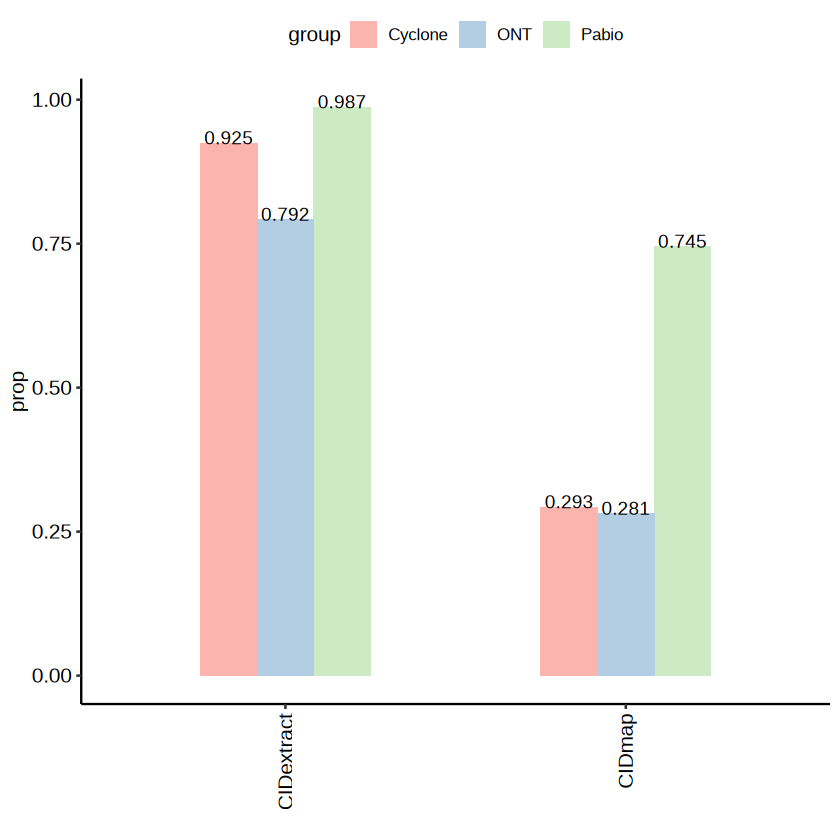

In [26]:
#sequencing qc
qcst$step = factor(qcst$step,levels = c("Segments","CIDextract","CIDmap"))
library(ggpubr)
pqc1 = ggplot(qcst[qcst$step != "Segments",],aes(x = step,y = prop,fill = group)) + 
    geom_bar(stat = "identity",position = "dodge",width = 0.5) + 
    geom_text(aes(label = round(prop,3)),position = position_dodge(0.5),vjust = 0.1,size = 4) + 
    scale_fill_brewer(palette = "Pastel1") +
    theme_pubr() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) + xlab("")
pqc1
ggexport(pqc1,filename = "../result/figure_revision/segments_cid_mapping_stat_T47_25_10_21.pdf",width = 3, height = 4)

#### reads segmentation

In [4]:
fseg.pb = read.delim("processed_data/T47_analysis/Fqsegment/T47_pacbio_250611.fq.summary.tsv",header = F)
head(fseg.pb)
length(unique(fseg.pb$V1))
colnames(fseg.pb) = c("readid","adapter","start","end","strand")
fseg.pb$width = fseg.pb$end - fseg.pb$start
fseg.pb %>%  summarise(mean = mean(width),median = median(width))
fseg.pb$group = "Pacbio"
fseg.pb = fseg.pb[,c("width","group")]
fseg.pb = fseg.pb[sample(x = 1:nrow(fseg.pb),size = 100000),]

,V1,V2,V3,V4,V5
,<chr>,<chr>,<int>,<int>,<chr>
1,read_0,adapterG-adapterH,1487,2094,+
2,read_0,adapterH-adapterI,2151,2794,+
3,read_0,adapterI-adapterJ,2851,3459,+
4,read_0,adapterJ-adapterK,3516,4175,+
5,read_0,adapterK-adapterL,4232,5259,+
6,read_0,adapterL-adapterM,5316,5866,+


mean,median
<dbl>,<dbl>
636.4574,588


In [28]:
readtn = length(unique(fseg.pb$readid))
readtn_wa = length(unique(fseg.pb[fseg.pb$adapter != "Noadapter",]$readid))
readtn_wa
readtn
readtn_wa/readtn

[1] 21304516

[1] 21320152

[1] 0.9992666

In [ ]:
fseg.st.pb = fseg.pb %>% group_by(readid) %>% 
        summarise(adaptern = sum(unique(adapter) != "Noadapter"),
                  strand = paste0(unique(strand),collapse = "-"),widtht = sum(width))
fseg.st.pb[!fseg.st.pb$strand %in% c("+","-","*"),]$strand = "mixed"
# fseg.st2 = fseg.st.pb %>% summarise(mean = mean(widtht),median = median(widtht),
#                                           mean_adapter = mean(adaptern),median(adaptern),
#                                           noadapter_rate = sum(adaptern == 0)/n())
# fseg.st2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


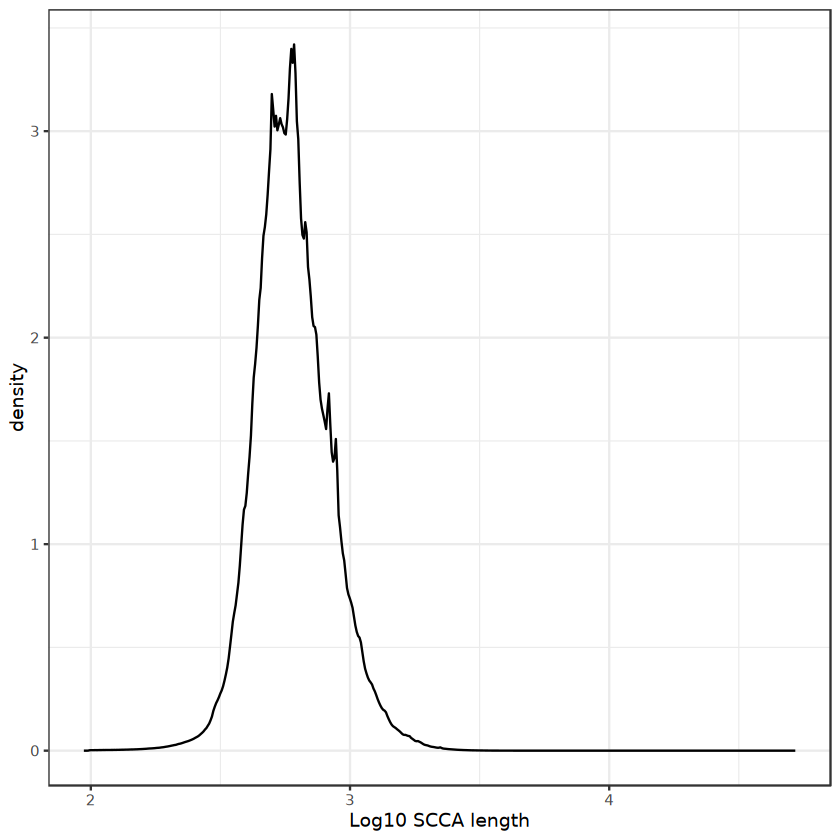

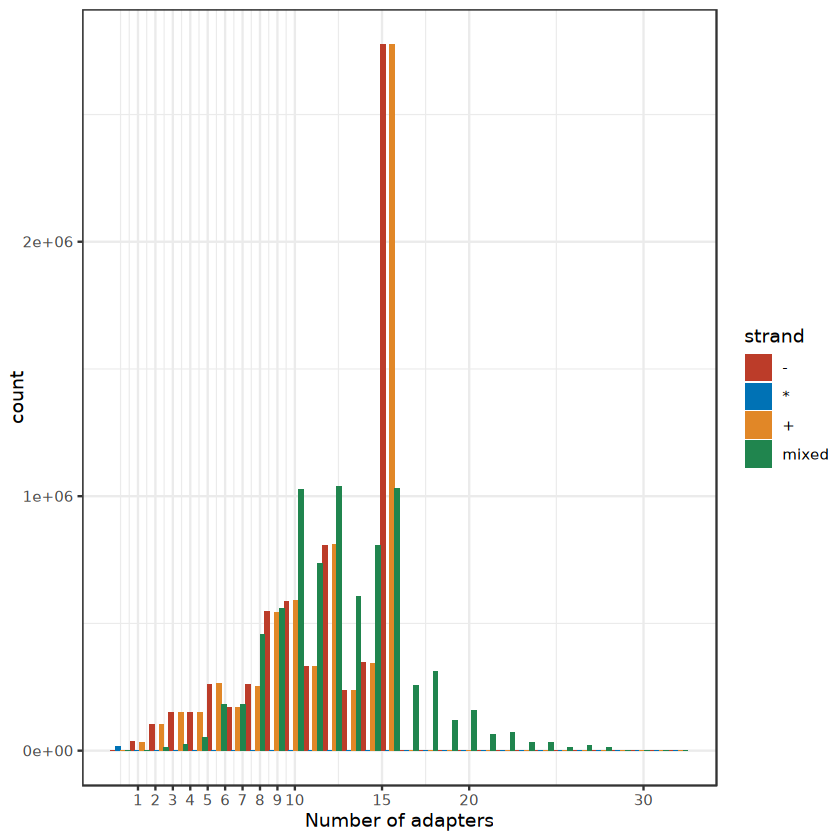

In [26]:
pqc2.1 = ggplot(fseg.pb,aes(x = log10(width))) + geom_density() + theme_bw() + scale_color_nejm() + xlab("Log10 SCCA length")
pqc2.1
pqc2.2 = ggplot(fseg.st.pb,aes(x = adaptern,fill = strand)) + 
        geom_histogram(width = 0.7,position = "dodge") + 
        #facet_grid(sample~.) +
        scale_x_continuous(breaks = c(1:10,15,20,30,40)) +
        theme_bw() + scale_fill_nejm()  + xlab("Number of adapters")
pqc2.2

In [27]:
ggexport(pqc2.1,filename = "downstream_analysis/result/figure_revision/segments_read_length_distribution_25_07_20.pdf",width = 4, height = 4)
ggexport(pqc2.2,filename = "downstream_analysis/result/figure_revision/segments_adapternum_25_07_20.pdf",width = 6, height = 5)

file saved to downstream_analysis/result/figure_revision/segments_read_length_distribution_25_07_20.pdf

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
file saved to downstream_analysis/result/figure_revision/segments_adapternum_25_07_20.pdf



In [29]:
1039038976/4

[1] 259759744

In [5]:
#cyclone
fseg = read.delim("processed_data/T47_analysis/Cyclone/Segment/T47.fq.summary.tsv",header = F)
head(fseg)
colnames(fseg) = c("readid","adapter","start","end","strand")
fseg$width = fseg$end - fseg$start
fseg %>%  summarise(mean = mean(width),median = median(width))
fseg$group = "Cyclone"
fseg = fseg[,c("width","group")]

,V1,V2,V3,V4,V5
,<chr>,<chr>,<int>,<int>,<chr>
1,read_0,Noadapter,0,631,*
2,read_1,adapterF,1,324,+
3,read_1,adapterF-adapterI,381,950,+
4,read_2,adapterB_RC-adapterB_RC,115,853,-
5,read_2,adapterB_RC,910,1112,-
6,read_3,adapterF,1,71,+


mean,median
<dbl>,<int>
625.3718,566


,V1,V2,V3,V4,V5
,<chr>,<chr>,<int>,<int>,<chr>
1,read_0,Noadapter,0,631,*
2,read_1,adapterF,1,324,+
3,read_1,adapterF-adapterI,381,950,+
4,read_2,adapterB_RC-adapterB_RC,115,853,-
5,read_2,adapterB_RC,910,1112,-
6,read_3,adapterF,1,71,+


mean,median
<dbl>,<int>
625.3718,566


[1] 37063813

[1] 40049174

[1] 0.9254576

mean,median,mean_adapter,median(adaptern),noadapter_rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3953.808,3403,5.448718,5,0.07454239


Warning message:
"Removed 244256 rows containing non-finite outside the scale range
(`stat_density()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


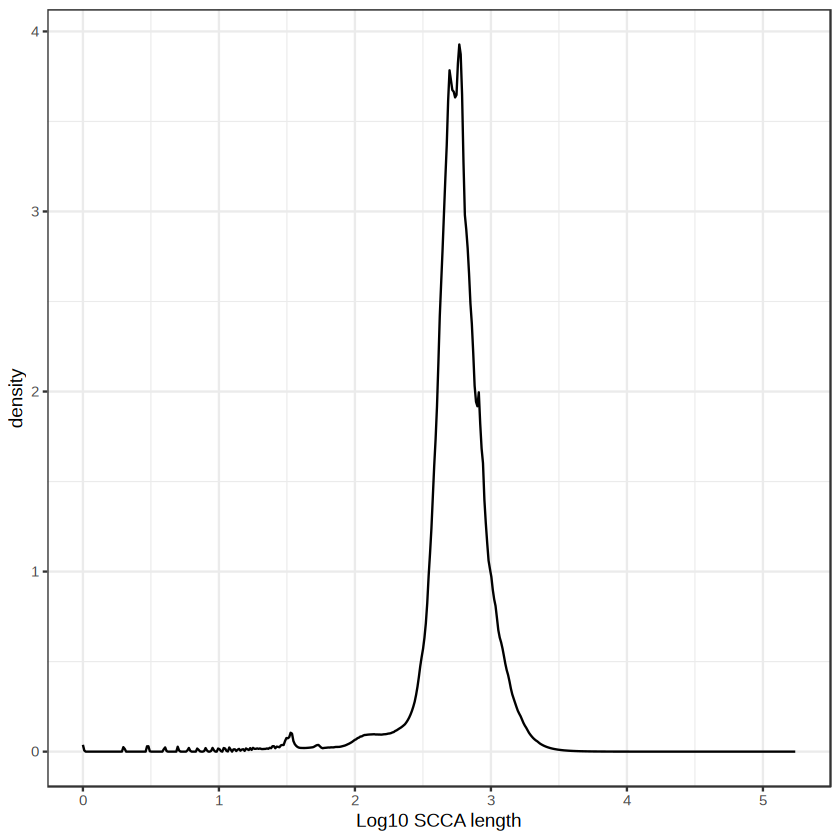

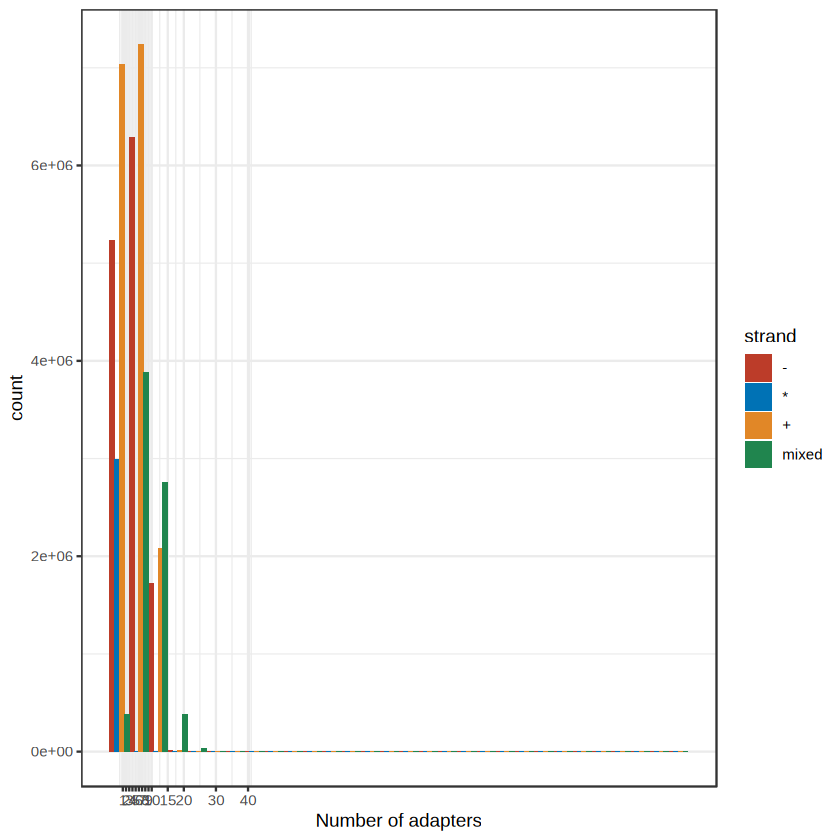

In [3]:
readtn = length(unique(fseg$readid))
readtn_wa = length(unique(fseg[fseg$adapter != "Noadapter",]$readid))
readtn_wa
readtn
readtn_wa/readtn

fseg.st = fseg %>% group_by(readid) %>% 
        summarise(adaptern = sum(unique(adapter) != "Noadapter"),
                  strand = paste0(unique(strand),collapse = "-"),widtht = sum(width))
fseg.st[!fseg.st$strand %in% c("+","-","*"),]$strand = "mixed"
fseg.st2 = fseg.st %>% summarise(mean = mean(widtht),median = median(widtht),
                                          mean_adapter = mean(adaptern),median(adaptern),
                                          noadapter_rate = sum(adaptern == 0)/n())
fseg.st2

pqc2.1 = ggplot(fseg,aes(x = log10(width))) + geom_density() + theme_bw() + scale_color_nejm() + xlab("Log10 SCCA length")
pqc2.1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


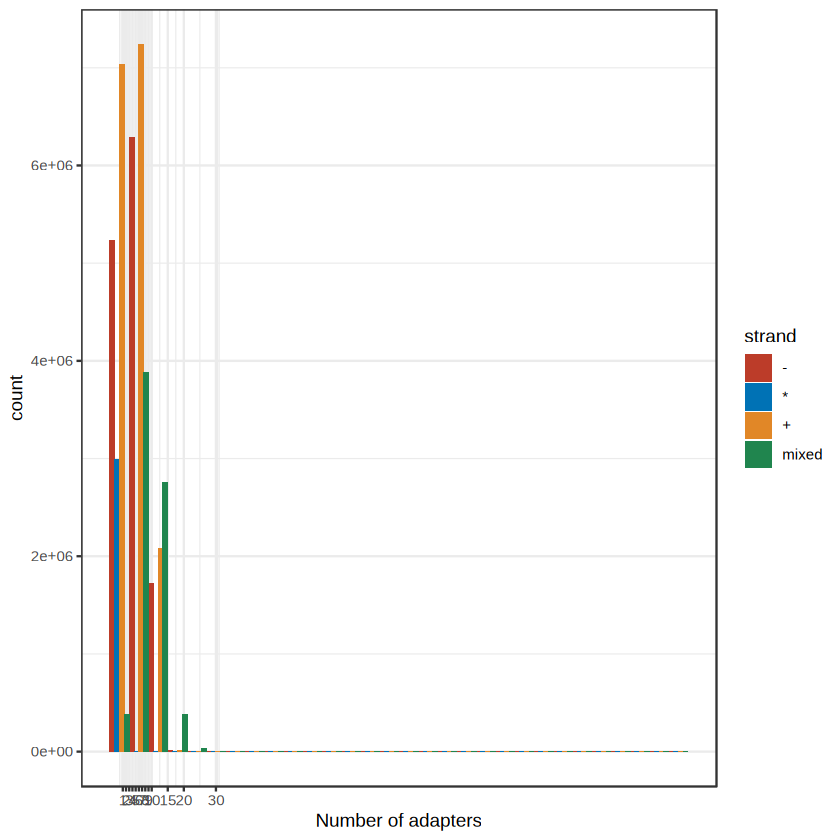

In [5]:
pqc2.2 = ggplot(fseg.st,aes(x = adaptern,fill = strand)) + 
        geom_histogram(width = 0.7,position = "dodge") + 
        #facet_grid(sample~.) +
        scale_x_continuous(breaks = c(1:10,15,20,30)) +
        theme_bw() + scale_fill_nejm()  + xlab("Number of adapters")
pqc2.2

Warning message:
"Removed 244256 rows containing non-finite outside the scale range
(`stat_density()`)."
Warning message:
"Removed 244256 rows containing non-finite outside the scale range
(`stat_density()`)."
file saved to /cluster/home/liuhengxin/P1_brain_nanopore/figures/revision/T47_qc_len_25_08_18.pdf



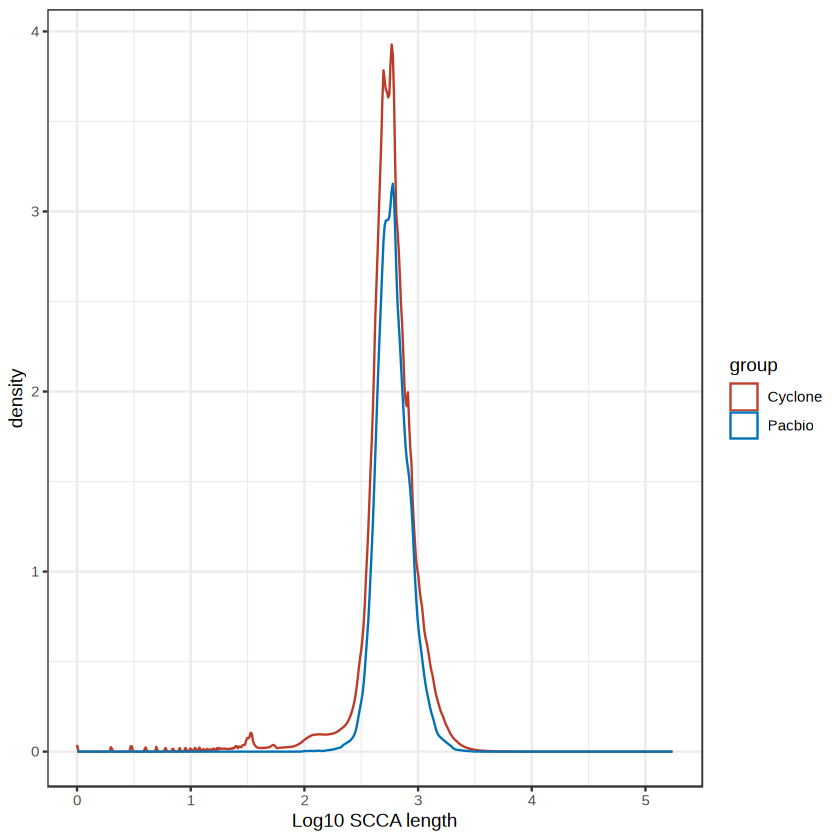

In [6]:
fseg = rbind(fseg,fseg.pb)
pqc2.1 = ggplot(fseg,aes(x = log10(width),color = group)) + geom_density() + theme_bw() + scale_color_nejm() + xlab("Log10 SCCA length")
pqc2.1
ggexport(pqc2.1,filename = "/cluster/home/liuhengxin/P1_brain_nanopore/figures/revision/T47_qc_len_25_08_18.pdf",width = 5, height = 4)

In [2]:
99900802/234266132

[1] 0.4264415

## Fullscope Data construct

### NGS annotation and genemx make

In [2]:
import pandas as pd
# 读取CSV文件
cellidan = pd.read_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_cell_annotation_T47_macaque_f001_2D_20220928_type20221110-macaque1-contour2.csv")
celltpan = pd.read_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/cell_type_type20230220-macaque1-contour2_v1.csv")
cellidan = pd.merge(cellidan, celltpan, on="cell_type_id")
cellidan = cellidan.iloc[:, 1:7]

areaan = pd.read_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/region-macaque179-20231109.csv")
areaan = areaan[areaan['chip'] == "T47"]
areaan = areaan[['global_region_id', 'origin_name']].drop_duplicates()

In [3]:
#T47的22版注释细胞类型是正确的，但是region id补全，而2311和2312的region id都是全的，但是细胞类型注释不匹配，故而先根据新版的来修正T47的region，再做细胞类型映射
rawngs_new = pd.read_parquet("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_macaque179-20231109.parquet")
rawngs_new['spot'] = rawngs_new['x'].astype(str) + '_' + rawngs_new['y'].astype(str)
rawngs_new = rawngs_new[['spot', 'gene_area']].drop_duplicates()
rawngs_new.to_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_macaque179-20231109_spotan.csv", index=False)

ngscount = pd.read_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_20221110-merge.txt",sep = "\t")
print(ngscount.head())
ngscount['spot'] = ngscount['x'].astype(str) + '_' + ngscount['y'].astype(str)
spot_to_genearea = rawngs_new.set_index('spot')['gene_area'].to_dict()
ngscount['gene_area'] = ngscount['spot'].map(spot_to_genearea)

ngscount = pd.merge(ngscount, cellidan, left_on="cell_label", right_on="cell_id", how="left")
len(ngscount)
ngscount = pd.merge(ngscount, areaan[['global_region_id', 'origin_name']], left_on="gene_area", right_on="global_region_id", how="left")
len(ngscount)
print(ngscount.head())
ngscount.to_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_macaque179_withan_25_10_18.txt",sep='\t')

    gene      x      y  umi_count  cell_label  gene_area     rx     ry
0  NOC2L  36340  46706          1    179889.0        427  37810  80594
1  NOC2L  36195  97028          1         0.0        475  37955  30272
2  NOC2L  36137  93130          1         0.0        474  38013  34170
3  NOC2L  13933  60470          1         0.0        579  60217  66830
4  NOC2L  18113  59801          1    388624.0          0  56037  67499
    gene      x      y  umi_count  cell_label  gene_area     rx     ry  \
0  NOC2L  36340  46706          1    179889.0        739  37810  80594   
1  NOC2L  36195  97028          1         0.0       1030  37955  30272   
2  NOC2L  36137  93130          1         0.0        722  38013  34170   
3  NOC2L  13933  60470          1         0.0          0  60217  66830   
4  NOC2L  18113  59801          1    388624.0          0  56037  67499   

          spot  cell_id  cell_type_id cell_type subclass class  \
0  36340_46706      NaN           NaN       NaN      NaN   NaN 

In [4]:
ngscount_down = ngscount.sample(n=100000, replace=False)
ngscount_down = ngscount_down.reset_index(drop=True)
ngscount_down.to_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_macaque179_withan_dowsample_25_10_18.txt",sep='\t')

In [1]:
import pandas as pd
ngscount = pd.read_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_macaque179_withan_25_10_18.txt",sep = "\t")
span = ngscount[['x', 'y','cell_label', 'gene_area','cell_id',
                 'cell_type_id','cell_type','subclass','class','global_region_id','origin_name']].drop_duplicates(keep='first')
span = span.reset_index(drop=True)
span = span[span['origin_name'] != "background"]
def my_split(string, separator, index):
    parts = string.split(separator)
    return parts[index] if index < len(parts) else None
span['layer'] = span['origin_name'].apply(lambda x: my_split(x, '-', 2))
span['region'] = span['origin_name'].apply(lambda x: my_split(x, '-', 1))
groupan_data = {
    "abv": ["cb", "cortex", "HC", "mb", "p", "str", "v", "amy", "HyTh", "cla", "wm", "th", "GP"],
    "ano": ["Cerebellum", "Cortex", "Hippocampus", "Midbrain", 
            "Pons", "Striatum", "Ventricle", "Amygdala", "Hypothalamus",
            "Claustrum", "Whitematter", "Thalamus", "Globuspallidus"]
}
groupan = pd.DataFrame(groupan_data)
span['subcortical'] = span['layer']
cortex_layers = [f"l{i}" for i in range(1, 7)]
span.loc[span['subcortical'].isin(cortex_layers), 'subcortical'] = 'cortex'
span['subcortical'] = span['subcortical'].map(groupan.set_index('abv')['ano'])
span.to_csv("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_macaque179_withan_dedup_25_10_18.txt",sep='\t')

### Process isoform annotation with bambu

In [8]:
#Cyclone
filels = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Alignment/",pattern = "*bam$")
filels = filels[filels != "T47.bam"]
filepathls = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Alignment/",filels)
outpathls = paste0("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/",filels)
outpathls

[1] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_012670.1.bam"   
  [2] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022272.1.bam"   
  [3] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022273.1.bam"   
  [4] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022274.1.bam"   
  [5] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022275.1.bam"   
  [6] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022276.1.bam"   
  [7] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022277.1.bam"   
  [8] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022278.1.bam"   
  [9] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022279.1.bam"   
 [10] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022280.1.bam"   
 [11] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022281.1.bam"   
 [12] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022282.1.bam"   
 [13] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022283.1.bam"   
 [14] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022284.1.bam"   
 [15] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022285.1.bam"   
 [16] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022286.1.bam"   
 [17] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022287.1.bam"   
 [18] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022288.1.bam"   
 [19] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022289.1.bam"   
 [20] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022290.1.bam"   
 [21] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022291.1.bam"   
 [22] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_022292.1.bam"   
 [23] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093009.1.bam"
 [24] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093010.1.bam"
 [25] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093012.1.bam"
 [26] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093018.1.bam"
 [27] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093033.1.bam"
 [28] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093034.1.bam"
 [29] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093035.1.bam"
 [30] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093054.1.bam"
 [31] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093055.1.bam"
 [32] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093056.1.bam"
 [33] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093058.1.bam"
 [34] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093062.1.bam"
 [35] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NW_005093093.1.bam"
 [36] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cycl

In [ ]:
#bambu annotation
.libPaths(c("/cluster/home/liuhengxin/software/miniconda3_2/envs/r-kernel/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3/envs/r4.1.2/lib/R/library",
           "/cluster/home/liuhengxin/software/miniconda3_2/envs/Rsplot/lib/R/library"))
library(bambu)
library(qs)
OuttablefromBambu = function(readtrans,sample){
    readtransf = readtrans[(lengths(readtrans$compatibleMatches) + lengths(readtrans$equalMatches)) > 0,]
    nrow(readtransf)
    rtnume = lengths(readtransf$equalMatches)
    rtnumc = lengths(readtransf$compatibleMatches)
    readid = rep(readtransf$readId,rtnume)
    tranid = unlist(readtransf$equalMatches)

    readtransf.dfe = data.frame("readid" = readid,
                              "tranid" = tranid,
                               "type" = "equal")
    readid = rep(readtransf$readId,rtnumc)
    tranid = unlist(readtransf$compatibleMatches)

    readtransf.dfc = data.frame("readid" = readid,
                              "tranid" = tranid,
                               "type" = "compatible")
    readtransf.df = rbind(readtransf.dfe,readtransf.dfc)
    readtransf.df = readtransf.df[!duplicated(readtransf.df[,1:3]),]
    readtransf.df$sample = sample
    return(readtransf.df)
}

BambuMatrixBuild = function(bamls,bambuAnnotations,genome,outfile,samples){
    se <- bambu(reads = c(bamls), 
                annotations = bambuAnnotations, 
                genome = genome,NDR = 0,
               trackReads = TRUE)
    se
    qsave(se,file = paste0(outfile,"_se.qs"))
    
    readtransf.df = NULL
    for(i in 1:length(metadata(se)$readToTranscriptMaps)){
        readtransf.dfi = OuttablefromBambu(metadata(se)$readToTranscriptMaps[[i]],samples[i])
        readtransf.df = rbind(readtransf.df,readtransf.dfi)
    }
    print(length(unique(readtransf.df$readid)))
    qsave(readtransf.df,file = paste0(outfile,"_trans_total_anno.qs"))
    return(readtransf.df)
}

setwd("/cluster/home/liuhengxin/P1_brain_nanopore/")
bambuAnnotations <- prepareAnnotations("ref/bambu_extended_annotations_novelname.gtf")
genome = "/cluster/home/liuhengxin/P1_brain_nanopore/ref/GCF_000364345.1_Macaca_fascicularis_5.0_genomic.fa"

#ONT
#bamls = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/Alignment/T47.bam"
#outfile = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/T47_bambu_ont"
#samples = c("T47_ont")
#readtrans.ont = BambuMatrixBuild(bamls,bambuAnnotations,genome,outfile,samples)
#length(unique(readtrans.ont$readid))



#bamls = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Alignment/T47.bam"
#outfile = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/T47_bambu_cyclone"

samples = c("T47_cyclone")
print(length(filels))
for(i in 1:length(filels)){
  readtrans.cyl = BambuMatrixBuild(filepathls[i],bambuAnnotations,genome,outpathls[i],samples)
  print(i)
}

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.3”
Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans

[1] 234


Detected Bambu derived annotations in the annotations. Set a new prefix with opt.discovery(list(prefix='newPrefix')) to prevent ambigious id assignment.

--- Start generating read class files ---

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org



In [4]:
outpathls = list.files("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/",pattern = "*trans_total_anno.qs",full.names = TRUE)
outpathls
readtrans.cyl = NULL
for(i in 1:length(outpathls)){
  readtransi = qread(outpathls[i])
  readtrans.cyl = rbind(readtrans.cyl,readtransi)
}
qsave(readtrans.cyl,
      file = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/T47_cyclone_trans_total_anno.qs")

[1] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_012670.1.bam_trans_total_anno.qs"   
 [2] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022272.1.bam_trans_total_anno.qs"   
 [3] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022273.1.bam_trans_total_anno.qs"   
 [4] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022274.1.bam_trans_total_anno.qs"   
 [5] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022275.1.bam_trans_total_anno.qs"   
 [6] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022276.1.bam_trans_total_anno.qs"   
 [7] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022277.1.bam_trans_total_anno.qs"   
 [8] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022278.1.bam_trans_total_anno.qs"   
 [9] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022279.1.bam_trans_total_anno.qs"   
[10] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022280.1.bam_trans_total_anno.qs"   
[11] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022281.1.bam_trans_total_anno.qs"   
[12] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022282.1.bam_trans_total_anno.qs"   
[13] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022283.1.bam_trans_total_anno.qs"   
[14] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022284.1.bam_trans_total_anno.qs"   
[15] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022285.1.bam_trans_total_anno.qs"   
[16] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022286.1.bam_trans_total_anno.qs"   
[17] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022287.1.bam_trans_total_anno.qs"   
[18] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022288.1.bam_trans_total_anno.qs"   
[19] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022289.1.bam_trans_total_anno.qs"   
[20] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022290.1.bam_trans_total_anno.qs"   
[21] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022291.1.bam_trans_total_anno.qs"   
[22] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NC_022292.1.bam_trans_total_anno.qs"   
[23] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NW_005093009.1.bam_trans_total_anno.qs"
[24] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NW_005093010.1.bam_trans_total_anno.qs"
[25] "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu//NW_005093012.1.bam_trans_total_anno.qs"

In [5]:
head(readtrans.cyl)

,readid,tranid,type,sample
,<chr>,<int>,<chr>,<chr>
1,read_11376422|adapterD-adapterE|2180-3405(+),11646,equal,T47_cyclone
2,read_14432491|adapterB-adapterB|12017-13170(+),11646,equal,T47_cyclone
3,read_34124220|adapterJ_RC-adapterB_RC|3369-4531(-),11646,equal,T47_cyclone
4,read_4409078|adapterB|1-1134(+),11646,equal,T47_cyclone
5,read_5262476|adapterC_RC-adapterM_RC|1817-3698(-),11646,equal,T47_cyclone
6,read_5623181|adapterB_RC-adapterB_RC|5331-6837(-),11646,equal,T47_cyclone


In [ ]:
#pacbio revo
setwd("/cluster/home/liuhengxin/P1_brain_nanopore/")
bambuAnnotations <- prepareAnnotations("ref/bambu_extended_annotations_novelname.gtf")
genome = "/cluster/home/liuhengxin/P1_brain_nanopore/ref/GCF_000364345.1_Macaca_fascicularis_5.0_genomic.fa"
bamls = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Alignment/T47_pacbio_250611.sorted.bam"
outfile = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_bambu_annotations"
samples = c("T47_revo")
readtransf.df = BambuMatrixBuild(bamls,bambuAnnotations,genome,outfile,samples)

In [ ]:
length(unique(readtrans.cyl$readid))

In [ ]:
#ONT
bamls = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/Alignment/T47.bam"
outfile = "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/T47_bambu_ont"
samples = c("T47_ont")
readtrans.ont = BambuMatrixBuild(bamls,bambuAnnotations,genome,outfile,samples)
length(unique(readtrans.ont$readid))

### Add spatial annotation

In [4]:
#1. load spatial annotation
span = fread("/cluster/home/liuhengxin/P1_brain_nanopore/ref/T47/total_gene_T47_macaque_f001_2D_macaque179_withan_dedup_25_10_18.txt")
span = span[,-1]
span$cidPos = paste0(span$x,"_",span$y) 
head(span)

x,y,cell_label,gene_area,cell_id,cell_type_id,cell_type,subclass,class,global_region_id,origin_name,layer,region,subcortical,cidPos
<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
36340,46706,179889,739,NA,NA,,,,739,L-DG-HC,HC,DG,Hippocampus,36340_46706
36195,97028,0,1030,NA,NA,,,,1030,L-F1-l6,l6,F1,Cortex,36195_97028
36137,93130,0,722,NA,NA,,,,722,L-F1-l5,l5,F1,Cortex,36137_93130
45019,94095,0,757,NA,NA,,,,757,L-3a/b-l4,l4,3a/b,Cortex,45019_94095
50422,93347,430565,755,430565,125,GABA LAMP5.3 KIT/FCRL3,LAMP5,GABA,755,L-3a/b-l2,l2,3a/b,Cortex,50422_93347
20554,87920,0,675,NA,NA,,,,675,L-cd-str,str,cd,Striatum,20554_87920


In [ ]:
#load cid map and transcript anno for pacbio
library(data.table)
readtransf.df = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_trans_total_anno_25_06_26.qs")
ciddf = fread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/CIDmapping/FP200000286BR_A1.barcodeToPos.bin.mapping.tsv")

#nrow(readtransf.df)
readtransf.df = merge(readtransf.df,ciddf[,c("readid","cidPos")])
#nrow(readtransf.df)
#qsave(readtransf.df,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_trans_total_anno_withcid_25_06_26.qs")
#head(readtransf.df)
span$cidPos = paste0(span$x,"_",span$y) 
readtransf.df = merge(readtransf.df,span,by = "cidPos")
qsave(readtransf.df,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_trans_total_anno_withcid_an_25_06_26.qs")
colnames(readtransf.df)[5] = "transcript_id"
readtransf.df = readtransf.df[readtransf.df$origin_name != "background",]
readtransf.df$region = MySplit(readtransf.df$origin_name,"-",2)
readtransf.df$layer = MySplit(readtransf.df$origin_name,"-",3)
qsave(readtransf.df,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_trans_total_anno_withcid_an_25_06_26.qs")

In [8]:
#load cid map and transcript anno for cyclone
readtrans.cyl = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/T47_cyclone_trans_total_anno.qs")
ciddf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/CIDmap/T47_filter.qs")
readtrans.cyl = merge(readtrans.cyl,span,by = "cidPos")
readtrans.cyl = merge(readtrans.cyl,ciddf[,c("readid","cidPos")])
nrow(readtrans.cyl)
qsave(readtrans.cyl,
      "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/T47_trans_total_anno_withcid_an_cyclone_25_10_24.qs")

[1] 418283375

[1] 114364298

In [30]:
#lack the transcript name
# se = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/Bambu/NC_012670.1.bam_se.qs")
# traninfo = mcols(se)
# flct = assays(se)$fullLengthCounts
# traninfo$fullLengthCounts = rowSums(flct)
readtrans.cyl$transcript_id = traninfo[match(readtrans.cyl$tranid, traninfo$txid),]$TXNAME
readtrans.cyl$gene_id = traninfo[match(readtrans.cyl$tranid, traninfo$txid),]$GENEID
qsave(readtrans.cyl,
      "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/T47_trans_total_anno_withcid_an_cyclone_25_10_24.qs")

In [23]:
ciddf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/CIDmap/T47_filter.qs")
length(unique(ciddf$readid))

[1] 68545021

In [7]:
#load cid map and transcript anno for cyclone
readtrans.ont = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/T47_bambu_ont_trans_total_anno.qs")
ciddf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/CIDmap/T47_filter.qs")
ciddf = merge(ciddf[,c("readid","cidPos")],span,by = "cidPos")
readtrans.ont = merge(readtrans.ont,ciddf,by = "readid")
nrow(readtrans.ont)
qsave(readtrans.ont,
      "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/T47_trans_total_anno_withcid_an_ont_25_10_24.qs")

[1] 1096294

In [31]:
#lack the transcript name
readtrans.ont = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/T47_trans_total_anno_withcid_an_ont_25_10_24.qs")
se = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/T47_bambu_ont_se.qs")
traninfo = mcols(se)
flct = assays(se)$fullLengthCounts
traninfo$fullLengthCounts = rowSums(flct)
readtrans.ont$transcript_id = traninfo[match(readtrans.ont$tranid, traninfo$txid),]$TXNAME
readtrans.ont$gene_id = traninfo[match(readtrans.ont$tranid, traninfo$txid),]$GENEID
qsave(readtrans.ont,
      "/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/ONT/T47_trans_total_anno_withcid_an_ont_25_10_24.qs")

In [ ]:
## combined summary data

In [24]:
readtrans.cyl = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/Cyclone/T47_trans_total_anno_withcid_an_cyclone_25_10_24.qs")
head(readtrans.cyl)
length(unique(readtrans.cyl$readid))

,cidPos,readid,tranid,type,sample,x,y,cell_label,gene_area,cell_id,cell_type_id,cell_type,subclass,class,global_region_id,origin_name,layer,region,subcortical
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,16584_100059,read_33818736|adapterB|1-473(+),49178,compatible,T47_cyclone,16584,100059,0,901,NA,NA,,,,901,L-F1-l2,l2,F1,Cortex
2,16584_100059,read_33818736|adapterB|1-473(+),49179,compatible,T47_cyclone,16584,100059,0,901,NA,NA,,,,901,L-F1-l2,l2,F1,Cortex
3,16584_100325,read_10868935|adapterG-adapterH|1604-2521(+),91773,compatible,T47_cyclone,16584,100325,285886,901,285886,5,GLU L2.5 ADAMTS12/GIPC2,L2,GLU,901,L-F1-l2,l2,F1,Cortex
4,16584_100389,read_32105650|adapterB-adapterF|2946-4013(+),51523,compatible,T47_cyclone,16584,100389,402384,902,NA,NA,,,,902,L-F1-l3,l3,F1,Cortex
5,16584_100820,read_14117640|adapterB|1-351(+),111119,equal,T47_cyclone,16584,100820,0,902,NA,NA,,,,902,L-F1-l3,l3,F1,Cortex
6,16584_100993,read_20534805|adapterI_RC-adapterG_RC|587-1321(-),82588,compatible,T47_cyclone,16584,100993,55190,902,NA,NA,,,,902,L-F1-l3,l3,F1,Cortex


[1] 16616884

In [10]:
readtrans.pab = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_trans_total_anno_withcid_an_25_06_26.qs")
head(readtrans.pab)

,cidPos,readid,tranid,type,transcript_id,gene_id,sample,cell_label,gene_area,x,y,rx,ry,origin_name,cell_type,subclass,class,cell_type_color,region,layer
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,10000_105701,read_16093508|adapterM-adapterN|3708-4476(+),209998,compatible,GNPTG-WeiLab-3,GNPTG,T47_revo,0,900,10000,105701,113177,62658,L-F1-l1,NA,NA,NA,NA,F1,l1
6,10000_105701,read_5431727|adapterM-adapterN|3708-4476(+),264102,compatible,XM_015442564.1,UNKL,T47_revo,0,900,10000,105701,113177,62658,L-F1-l1,NA,NA,NA,NA,F1,l1
7,10000_105701,read_5431727|adapterM-adapterN|3708-4476(+),264100,compatible,XM_015442562.1,UNKL,T47_revo,0,900,10000,105701,113177,62658,L-F1-l1,NA,NA,NA,NA,F1,l1
8,10000_105701,read_5431727|adapterM-adapterN|3708-4476(+),209998,compatible,GNPTG-WeiLab-3,GNPTG,T47_revo,0,900,10000,105701,113177,62658,L-F1-l1,NA,NA,NA,NA,F1,l1
9,10000_105701,read_16093508|adapterM-adapterN|3708-4476(+),264101,compatible,XM_015442563.1,UNKL,T47_revo,0,900,10000,105701,113177,62658,L-F1-l1,NA,NA,NA,NA,F1,l1
10,10000_105701,read_16093508|adapterM-adapterN|3708-4476(+),264102,compatible,XM_015442564.1,UNKL,T47_revo,0,900,10000,105701,113177,62658,L-F1-l1,NA,NA,NA,NA,F1,l1


In [32]:
#transan = unique(readtrans.pab[,c("tranid","transcript_id","gene_id")])
readtrans.ont$group = "ONT"
readtrans.cyl$group = "Cyclone"
readtrans.pab$group = "Pacbio"
cmid = intersect(colnames(readtrans.pab),colnames(readtrans.cyl))
readtrans.pab = rbind(readtrans.pab[,cmid],readtrans.ont[,cmid],readtrans.cyl[,cmid])
qsave(readtrans.pab,"/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/T47_analysis/T47_trans_total_anno_withcid_an_allsample_25_10_24.qs")
length(unique(readtrans.pab$readid))

[1] 83222234

In [33]:
fsraw.cor = readtrans.pab %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
length(unique(fsraw.cor$readid))
qsave(fsraw.cor,"downstream_analysis/data/reads_full_anotation/T47_main_data_read_total_annotation_delete_multiread_total_25_10_26.qs")

[1] 42449734

### technical QC for T47

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2575 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2311 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2575 rows containing missing values"
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is alrea

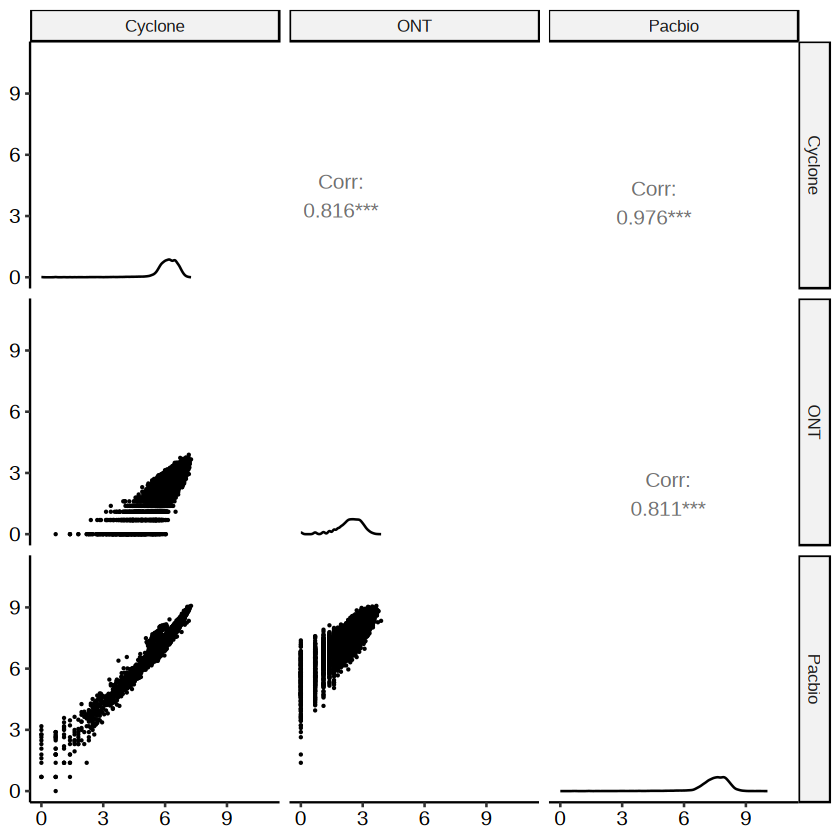

In [66]:
#spatial density
#bin200 stat
ra = 200
fsraw.cor$xid = as.integer(fsraw.cor$x/(ra*2)) * ra * 2 + ra
fsraw.cor$yid = as.integer(fsraw.cor$y/(ra*2)) * ra * 2 + ra
fsraw.cor$blockid = paste0(fsraw.cor$xid,"_",fsraw.cor$yid)
binst = fsraw.cor %>% group_by(group,blockid) %>% summarise(count = length(unique(readid)))
# qsave(binst,"data/fullscope_qc/sample_platform_binstat_bin50_25_10_20.qs")
# head(binst)
binst = binst %>% group_by(group) %>% mutate(norm = scale(count))
binst$log = log(binst$count)
binstl = dcast(binst,blockid~group,value.var = "log")
# head(binstl)
# colnames(binstl) = c("blockid","FS-Cyclone","Direct-ONT","FS-ONT","FS-Pacbio")

# binstl = binstl[,c("blockid","FS-Cyclone","FS-ONT","FS-Pacbio","Direct-ONT")]
library(GGally)
p1.1 = ggpairs(binstl[, c(2:4)],  
        upper = list(continuous = wrap("cor", method = "pearson")),
        lower = list(continuous = wrap("points",size = 0.1))) + 
        xlim(c(0,11)) + ylim(c(0,11)) + 
        theme_pubr()
p1.1

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 24201 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 16929 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 24197 rows containing missing values"
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is al

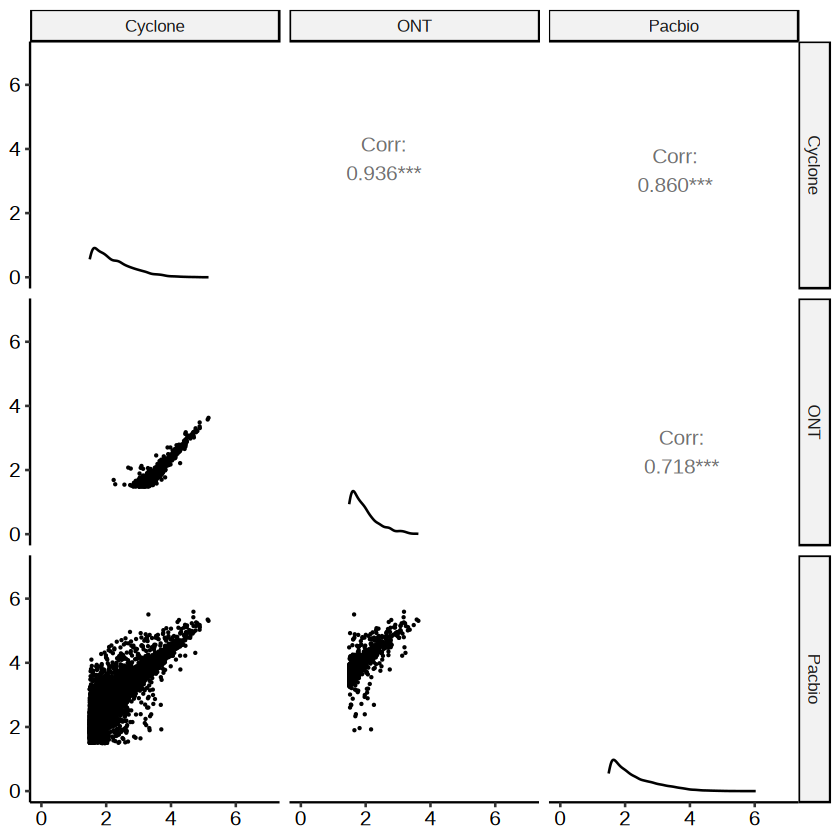

In [68]:
#isoform expression
transt = fsraw.cor %>% group_by(group,transcript_id) %>% summarise(count = length(unique(readid)))
transt = transt %>% group_by(group) %>% mutate(norm = scale(count))
transt$log = log10(transt$count)
transtl = dcast(transt[transt$count>30,],transcript_id~group,value.var = "log")
#colnames(transtl) = c("transcript_id","FS-Cyclone","Direct-ONT","FS-ONT","FS-Pacbio")
#transtl = transtl[,c("transcript_id","FS-Cyclone","FS-ONT","FS-Pacbio","Direct-ONT")]
p1.2 = ggpairs(transtl[, c(2:4)],  
        upper = list(continuous = wrap("cor", method = "pearson")),
        lower = list(continuous = wrap("points",size = 0.1))) + 
        xlim(c(0,7)) + ylim(c(0,7)) + 
        theme_pubr()
p1.2

### DTU calculate

In [3]:
#calculate DTUs
transtls = list()

#build data
{
    FullLengthTranSt = function(fs.info){
      transtl = fs.info %>% group_by(gene_id, areatr) %>% 
        mutate(genecount = length(unique(readid))) %>% 
        group_by(gene_id,transcript_id,areatr) %>% 
        summarise(count = length(unique(readid)),
                  genecount = unique(genecount))
      transtl = transtl[transtl$areatr != "" &
                          !is.na(transtl$areatr),]
      return(transtl)
    }
    
    #layer
    # npclf = npclf[npclf$arealayer %in% paste0("l",1:6),]
    fs.info.cortex = fsraw.cor[fsraw.cor$layer %in% paste0("l",1:6),]
    fs.info.cortex$areatr = fs.info.cortex$layer
    transtls$layer = FullLengthTranSt(fs.info.cortex)
    
    # #region
    # fs.info.cortex$areatr = fs.info.cortex$region
    # transtls$region = FullLengthTranSt(fs.info.cortex)
    
    # #lobe
    # fs.info.cortex$areatr = fs.info.cortex$lobe
    # transtls$lobe = FullLengthTranSt(fs.info.cortex)
    
    #subclass
    fs.info.cortex$areatr = fs.info.cortex$subclass
    transtls$subclass = FullLengthTranSt(fs.info.cortex)
    
    #class
    fs.info.cortex$areatr = fs.info.cortex$class
    transtls$class = FullLengthTranSt(fs.info.cortex)
    
    # #class
    # fsraw.cor$areatr = fsraw.cor$subcortical
    # transtls$subcortical = FullLengthTranSt(fsraw.cor)
    
}
qsave(transtls,"downstream_analysis/data/reads_full_anotation/T47_read_trans_stat_list_dedup_fsrawcor_25_10_26.qs")


ERROR: Error: object 'fsraw.cor' not found


In [35]:
transt = transtls$layer
CalSigIsoform = function(transt){
    transt = transt[!is.na(transt$areatr),]
    transt = transt[transt$areatr != "",]
    transt$relative = transt$count/transt$genecount
    #transtf = transt[transt$count > 5,]
    transtf = transt[transt$genecount > 20,]
    transtf = transtf %>% group_by(transcript_id) %>% 
      mutate(meanrelative = mean(relative),
             otherrelative = (sum(relative) - relative)/(n() - 1))
    transtf = transtf[which(transtf$meanrelative > 0.05),]

    arean = length(unique(transtf$areatr))

    #areanth = arean*(1/3)
   # print(areanth)
    transtf = transtf %>% group_by(transcript_id) %>% 
       filter(length(unique(areatr)) > 1)
    transtf = transtf %>% group_by(gene_id) %>% 
      filter(length(unique(transcript_id))>1)
    
    # transtf$lfc = log2(transtf$relative/transtf$meanrelative)
    transtf$dr = transtf$relative - transtf$otherrelative
    transtf$sig = "N"
    table(transtf$sig)
    
    #transtf$pvalue = 1
    MyChiqTest = function(transcript_id, areatr, count){
      dat = data.frame(transcript_id = transcript_id, areatr = areatr,
                       count = count)
      dat = dcast(dat, areatr~transcript_id,
                  value.var = "count",
                  fun.aggregate = sum)
      rownames(dat) = dat$areatr;dat = dat[-1]
      p = tryCatch(chisq.test(as.matrix(dat))$p.value, 
                   error = function(e) NA)
      return(p)
    }
    pvdf = transtf %>% group_by(gene_id) %>% summarise(pvalue = MyChiqTest(transcript_id, areatr, count))
    pvdf$padj = p.adjust(pvdf$pvalue,method = "BH")
    transtf = merge(transtf,pvdf,by = "gene_id")
    #print(head(transtf))
    # table(transtf[transtf$padj < 0.05,]$sig)
    #transtf[transtf$padj < 0.05,]$sig = "Y"
    transtf[which(transtf$dr > 0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Up"
    transtf[which(transtf$dr < -0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Down"
    return(transtf)
}
  isosigls = list()
for (i in 1:length(transtls)) {
    print(i)
    isosigls[[i]] = CalSigIsoform(transtls[[i]])
}
names(isosigls) = names(transtls)
for (i in 1:length(isosigls)) {
    print(length(unique(isosigls[[i]][isosigls[[i]]$sig!="N",]$gene_id)))
}


[1] 1


Warning message:
"There were 2258 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 2: `gene_id = "AADAT"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2257 remaining warnings."


[1] 2


Warning message:
"There were 535 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "ABHD12"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 534 remaining warnings."


[1] 3


Warning message:
"There were 481 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "ABCA5"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 480 remaining warnings."


[1] 909
[1] 205
[1] 66


In [36]:
isosigi = isosigls$layer
isosigi[isosigi$count > 200 & abs(isosigi$dr) > 0.15,]
#isosigi = isosigls$region
isosigi[isosigi$gene_id == "DDRGK1",]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
496,AIFM3,XM_015457402.1,l1,230,241,0.9543568,0.8254798,0.7997044,0.1546525,Up,2.506169e-12,2.516722e-10
1732,ARPP21,XM_015444956.1,l3,349,1176,0.2967687,0.5092998,0.5518061,-0.2550374,Down,3.234742e-72,4.114592e-69
1734,ARPP21,XM_015444956.1,l5,406,581,0.6987952,0.5092998,0.4714008,0.2273944,Up,3.234742e-72,4.114592e-69
1735,ARPP21,XM_015444956.1,l6,317,465,0.6817204,0.5092998,0.4748157,0.2069047,Up,3.234742e-72,4.114592e-69
5360,BSG,XM_005587297.2,l5,204,261,0.7816092,0.6527098,0.6269299,0.1546793,Up,4.602001e-04,3.498254e-03
6579,CAPRIN1,XM_005578232.2,l1,249,342,0.7280702,0.5866315,0.5583437,0.1697265,Up,8.989861e-09,4.106732e-07
8615,COMMD9,XM_005578178.2,l3,239,322,0.7422360,0.5988948,0.5702266,0.1720094,Up,1.007152e-17,1.830140e-15
8676,COPS5,XM_015454930.1,l5,236,257,0.9182879,0.7906242,0.7650914,0.1531965,Up,8.499212e-06,1.430667e-04
9385,DBNDD2,XM_005569136.2,l6,382,949,0.4025290,0.5598032,0.5912580,-0.1887291,Down,1.455042e-26,3.966028e-24


,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
9539,DDRGK1,DDRGK1-WeiLab-1,l1,628,984,0.6382114,0.5642124,0.5494126,0.08879882,N,1.030153e-143,3.931065e-140
9540,DDRGK1,DDRGK1-WeiLab-1,l2,2094,2791,0.7502687,0.5642124,0.5270011,0.22326762,Up,1.030153e-143,3.931065e-140
9541,DDRGK1,DDRGK1-WeiLab-1,l3,3412,5098,0.6692821,0.5642124,0.5431984,0.12608364,Up,1.030153e-143,3.931065e-140
9542,DDRGK1,DDRGK1-WeiLab-1,l4,211,515,0.4097087,0.5642124,0.5951131,-0.18540436,Down,1.030153e-143,3.931065e-140
9543,DDRGK1,DDRGK1-WeiLab-1,l5,582,1393,0.4178033,0.5642124,0.5934942,-0.17569088,Down,1.030153e-143,3.931065e-140
9544,DDRGK1,DDRGK1-WeiLab-1,l6,651,1302,0.5000000,0.5642124,0.5770548,-0.07705484,N,1.030153e-143,3.931065e-140
9545,DDRGK1,XM_005568473.2,l1,356,984,0.3617886,0.4357876,0.4505874,-0.08879882,N,1.030153e-143,3.931065e-140
9546,DDRGK1,XM_005568473.2,l2,697,2791,0.2497313,0.4357876,0.4729989,-0.22326762,Down,1.030153e-143,3.931065e-140
9547,DDRGK1,XM_005568473.2,l3,1686,5098,0.3307179,0.4357876,0.4568016,-0.12608364,Down,1.030153e-143,3.931065e-140


In [37]:
qsave(isosigls,file = "downstream_analysis/data/dtu_analysis/T47_dtu_isoform_ls_fsraw_cor_25_10_26.qs")

### DTU case plot

In [38]:
theme_presentation<- function(base_size = 16, base_family = "") {
  # Starts with theme_grey and then modify some parts
  theme_bw(base_size = base_size, base_family = base_family) %+replace%
    theme(
      strip.background = element_blank(),
      strip.text.x = element_text(size=16,colour="white"),
      strip.text.y = element_text(size=16,colour="white"),
      axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks =  element_blank(), 
      axis.title.x= element_blank(),
      axis.title.y= element_blank(),
      panel.background = element_rect(fill="black"), 
      panel.border =element_blank(),  
      panel.grid.major = element_blank(), 
      panel.grid.minor = element_blank(), 
      panel.margin = unit(1.0, "lines"), 
      plot.background = element_rect(fill="black"), 
      plot.title =element_text(size=16,colour="white"), 
      # plot.margin = unit(c(1,  1, 1, 1), "lines"),
      legend.background=element_rect(fill='black'),
      legend.title=element_text(size=12,colour="white"),
      legend.text=element_text(size=12,colour="white"),
      legend.key = element_rect( fill = 'black'),
      # legend.key.size = unit(c(0, 0), "lines"),
      axis.line.x = element_blank(),
      axis.line.y = element_blank()
    )
}

SpCasePlot = function(fsraw.cor,geneex,hubtrans,backpt,ptsize = 1,backsize = 0.05){
    mkdf = fsraw.cor[fsraw.cor$gene_id == geneex,]
    mkdf = mkdf[mkdf$transcript_id %in% hubtrans,]
    mkdf = mkdf[order(as.numeric(factor(mkdf$transcript_id,levels = hubtrans))),]
    mycolor = distinctColorPalette(length(hubtrans))
    #mkdf = mkdf[order(mkdf$transcript_id),]
    pmkpti1 = ggplot() +
      scattermore::geom_scattermore(
        data = backpt,
        aes(x,y),
        color = "white",
        # pixels = raster.dpi,
        pointsize = backsize
      ) +
      geom_point(data = mkdf,
                 aes(x,y,fill = transcript_id),shape = 21,size = ptsize,stroke = NA) + 
      # geom_segment(data = edgesdf, aes(x = x1, y = y1, xend = x2, yend = y2,color = areatr),
      #            size = 0.5,alpha = 0.75) + 
     # scale_size(range = c(0.05,0.1)) +
      #facet_wrap(~layer,nrow = 2) 
      theme_void() +
      scale_fill_discreterainbow() +
      #scale_fill_manual(values = mycolor) +
      #scale_color_flatui() +
      theme_presentation() + 
      theme(legend.position = "top",legend.title = element_blank(),
            legend.text = element_text(size = 18)) +
      guides(color = guide_legend(override.aes = list(size=8),nrow = 3),
            fill = guide_legend(override.aes = list(size=8),nrow = 2),
            size = "none")
      #scale_y_reverse() + scale_x_reverse()
    return(pmkpti1)
}

In [39]:
backpt = unique(fsraw.cor[,c("x","y","layer","region")])

In [40]:
#backpt = qread("longread_cell_isoform_without_subcortical_24_04_29.qs")
qsave(backpt,file = "downstream_analysis/data/dtu_analysis/T47_longread_cell_isoform_without_subcortical_25_10_27.qs")
# backpt = qread("downstream_analysis/data/dtu_analysis/T47_longread_cell_isoform_without_subcortical_25_07_01.qs")
# head(backpt)

Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure2/T47_DDRGK1_layer_case_bin1_25_10_27.pdf



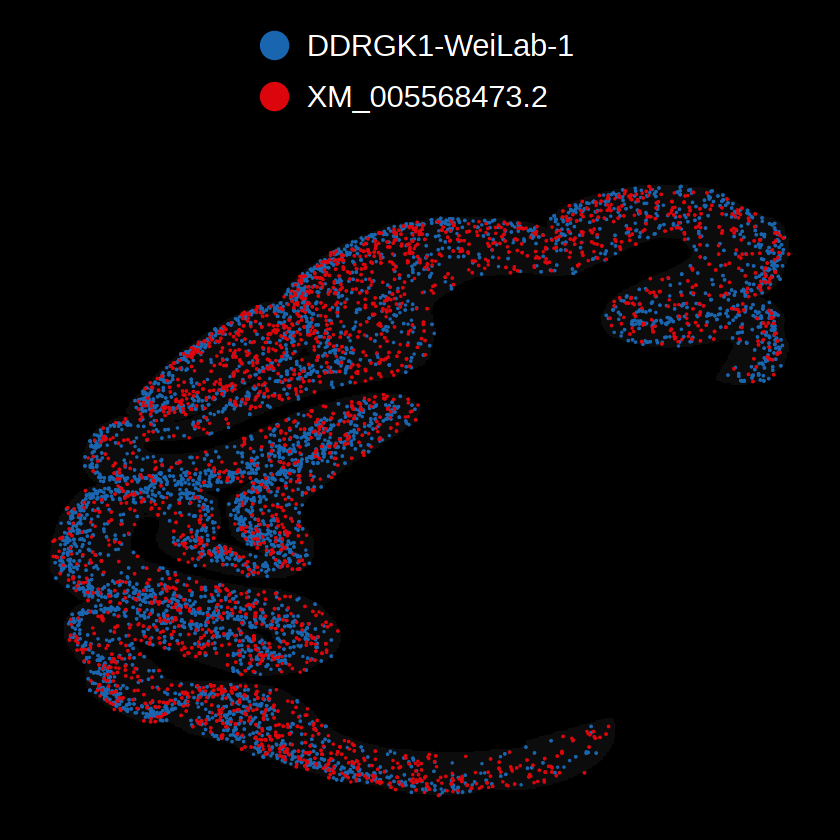

In [41]:
geneex = "DDRGK1"
transid = c("DDRGK1-WeiLab-1","XM_005568473.2")
#edgesdf.zoom = edgesdf[edgesdf$areaid %in% "PEa",]
pc1 = SpCasePlot(fs.info.cortex,geneex,transid,backpt[backpt$layer %in% paste0("l",1:6),],0.7)
# pc1 = pc1 + geom_segment(data = edgesdf.zoom, 
#                    aes(x = x1, y = y1, xend = x2, yend = y2),
#                    size = 1,alpha = 1,
#                    color = "white")
pc1 = pc1 + scale_x_reverse()
pc1
fileid = paste0("downstream_analysis/result/figure2/T47_",geneex,"_layer_case_bin1_25_10_27.pdf")
ggexport(pc1,filename = fileid,width = 4,height = 6)

file saved to downstream_analysis/result/figure2/T47_ARPP19_layer_case_bin1_25_07_02.pdf



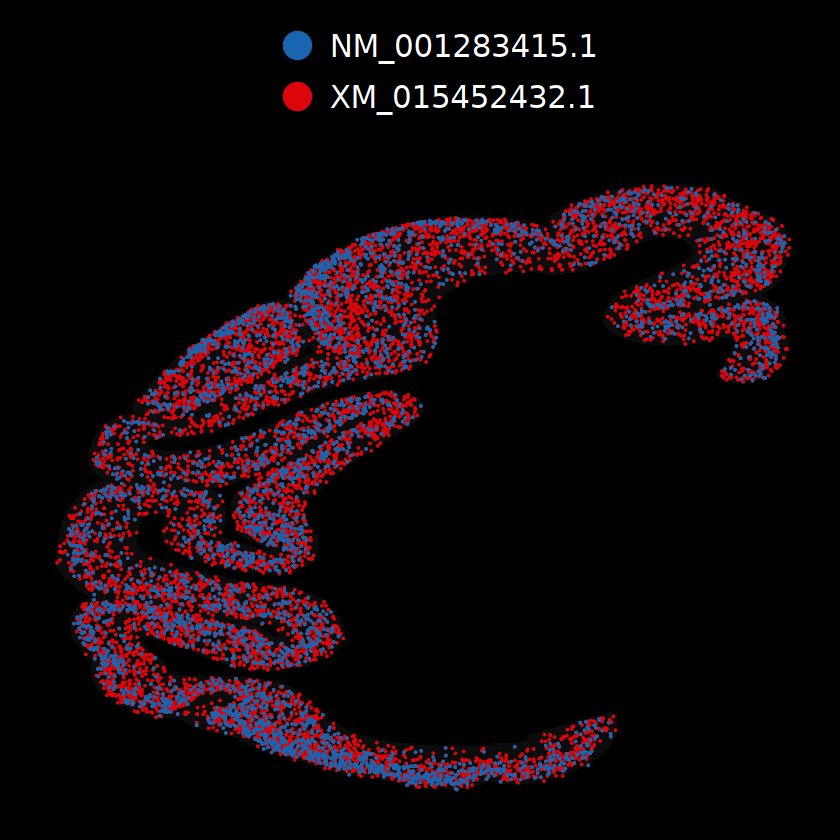

In [26]:
geneex = "ARPP19"
transid = c("XM_015452432.1","NM_001283415.1")
readtransf.hub = readtransf.df[readtransf.df$layer %in% paste0("l",1:6) & readtransf.df$gene_id %in% geneex,]
#edgesdf.zoom = edgesdf[edgesdf$areaid %in% "PEa",]
pc2 = SpCasePlot(readtransf.hub,geneex,transid,backpt[backpt$layer %in% paste0("l",1:6),],0.7)
# pc1 = pc1 + geom_segment(data = edgesdf.zoom, 
#                    aes(x = x1, y = y1, xend = x2, yend = y2),
#                    size = 1,alpha = 1,
#                    color = "white")
pc2 = pc2 + scale_x_reverse()
pc2
fileid = paste0("downstream_analysis/result/figure2/T47_",geneex,"_layer_case_bin1_25_10_07.pdf")
ggexport(pc2,filename = fileid,width = 4,height = 6)

Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure2/T47_DBNDD2_layer_case_bin1_25_10_27.pdf



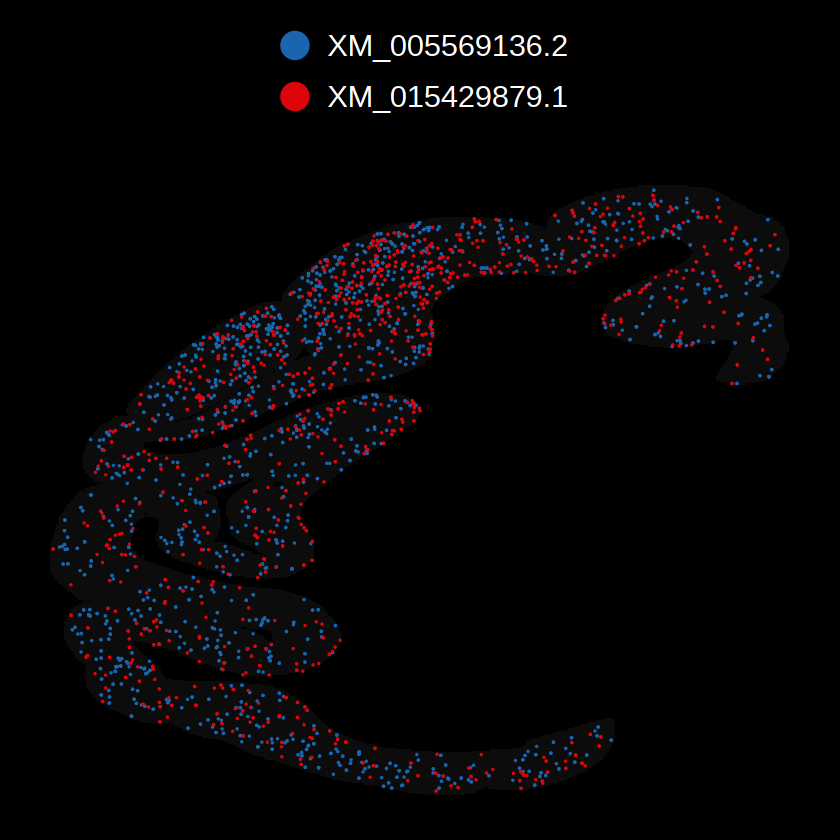

In [42]:
geneex = "DBNDD2"
transid = c("XM_005569136.2","XM_015429879.1")
#edgesdf.zoom = edgesdf[edgesdf$areaid %in% "PEa",]
pc2 = SpCasePlot(fs.info.cortex,geneex,transid,backpt[backpt$layer %in% paste0("l",1:6),],0.7)
# pc1 = pc1 + geom_segment(data = edgesdf.zoom, 
#                    aes(x = x1, y = y1, xend = x2, yend = y2),
#                    size = 1,alpha = 1,
#                    color = "white")
pc2 = pc2 + scale_x_reverse()
pc2
fileid = paste0("downstream_analysis/result/figure2/T47_",geneex,"_layer_case_bin1_25_10_27.pdf")
ggexport(pc2,filename = fileid,width = 4,height = 6)

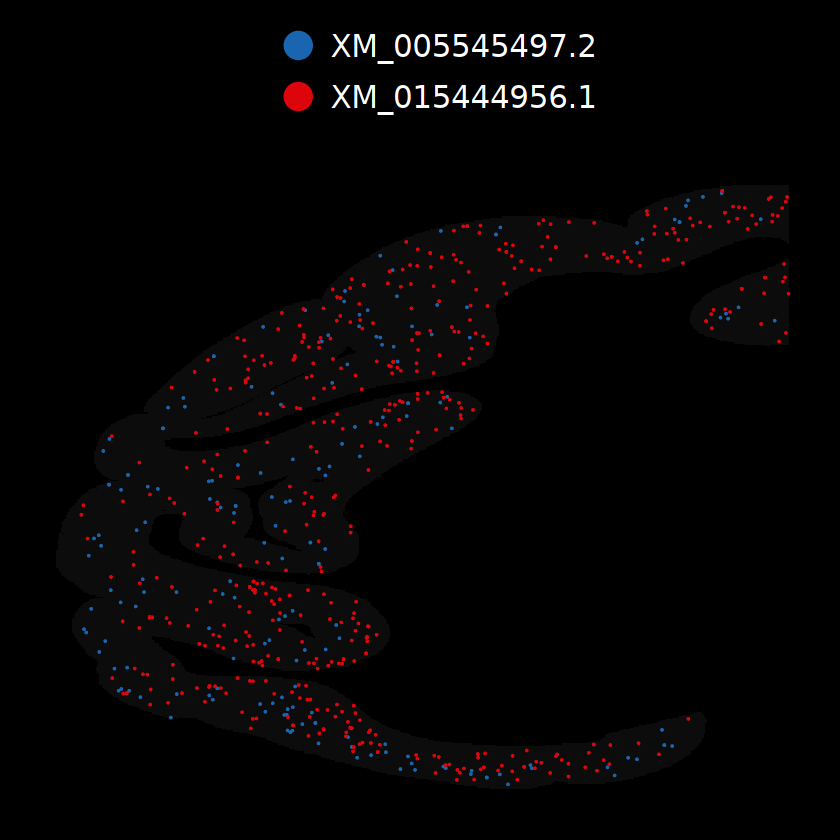

In [91]:
geneex = "ARPP21"
transid = c("XM_005545497.2","XM_015444956.1")
#edgesdf.zoom = edgesdf[edgesdf$areaid %in% "PEa",]
pc2 = SpCasePlot(fs.info.cortex,geneex,transid,backpt[backpt$layer %in% paste0("l",1:6),],0.7)
# pc1 = pc1 + geom_segment(data = edgesdf.zoom, 
#                    aes(x = x1, y = y1, xend = x2, yend = y2),
#                    size = 1,alpha = 1,
#                    color = "white")
pc2 + scale_x_reverse()

In [ ]:
geneex = "ARPP21"
transid = fs.info.cortex
#edgesdf.zoom = edgesdf[edgesdf$areaid %in% "PEa",]
pc2 = SpCasePlot(fs.info.cortex,geneex,transid,backpt[backpt$layer %in% paste0("l",1:6),],0.7)
# pc1 = pc1 + geom_segment(data = edgesdf.zoom, 
#                    aes(x = x1, y = y1, xend = x2, yend = y2),
#                    size = 1,alpha = 1,
#                    color = "white")
pc2 + scale_x_reverse()

In [53]:
unique(fsraw.cor[fsraw.cor$gene_id == "CALY",]$transcript_id)

[1] "XM_005566789.2"

In [43]:
geneex = "MYL6"
transid = c("MYL6-WeiLab-1","MYL6-WeiLab-2")
#edgesdf.zoom = edgesdf[edgesdf$areaid %in% "PEa",]
pc2 = SpCasePlot(fsraw.cor,geneex,transid,backpt,0.7)
# pc1 = pc1 + geom_segment(data = edgesdf.zoom, 
#                    aes(x = x1, y = y1, xend = x2, yend = y2),
#                    size = 1,alpha = 1,
#                    color = "white")
pc2 = pc2 + scale_x_reverse()
fileid = paste0("downstream_analysis/result/figure_revision/T47_",geneex,"_brain_case_bin1_25_10_27.pdf")
ggexport(pc2,filename = fileid,width = 4,height = 6)

Warning message in plot_theme(plot):
"The `panel.margin` theme element is not defined in the element hierarchy."
file saved to downstream_analysis/result/figure_revision/T47_MYL6_brain_case_bin1_25_10_27.pdf



In [44]:
geneex = "RTN1"
transid = c("XM_005561388.2","XM_005561389.2")
fsraw.hub = fsraw[fsraw$layer %in% paste0("l",1:6) & fsraw$gene_id %in% geneex,]
fsraw.hub = fsraw.hub %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
#edgesdf.zoom = edgesdf[edgesdf$areaid %in% "PEa",]
pc2 = SpCasePlot(fsraw.hub,geneex,transid,backpt[backpt$layer %in% paste0("l",1:6),],0.7)
# pc1 = pc1 + geom_segment(data = edgesdf.zoom, 
#                    aes(x = x1, y = y1, xend = x2, yend = y2),
#                    size = 1,alpha = 1,
#                    color = "white")
pc2 = pc2 + scale_x_reverse()
fileid = paste0("downstream_analysis/result/figure_revision/T47_",geneex,"_layer_case_bin1_25_10_27.pdf")
ggexport(pc2,filename = fileid,width = 4,height = 6)

ERROR: Error: object 'fsraw' not found


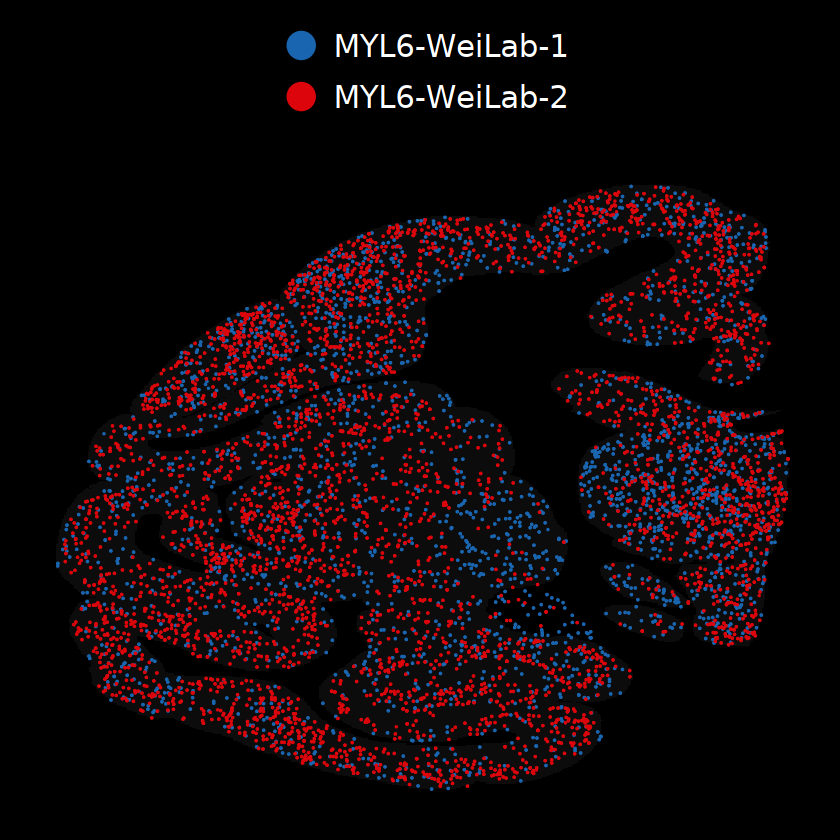

In [51]:
pc2

In [13]:
groupan = data.frame("abv" = c("cb","cortex","HC","mb","p","str","v","amy","HyTh","cla","wm","th","GP"),
                       "ano" = c("Cerebellum","Cortex","Hippocampus","Midbrain",
                                 "Pons","Striatum","Ventricle","Amygdala","Hypothalamus",
                                 "Claustrum","Whitematter","Thalamus","Globuspallidus"))
backpt$subcortical = backpt$layer
backpt[backpt$subcortical %in% paste0("l",1:6),]$subcortical = "cortex"
backpt = backpt[!backpt$subcortical %in% c("c","f"),]
backpt$subcortical = groupan[match(backpt$subcortical,groupan$abv),]$ano
head(backpt)

x,y,layer,region,subcortical
<int>,<int>,<chr>,<chr>,<chr>
10000,105755,l1,F1,Cortex
10000,105826,l1,F1,Cortex
10000,106076,l1,F1,Cortex
10000,106142,l1,F1,Cortex
10000,107238,l1,F1,Cortex
10000,107721,l1,F1,Cortex


file saved to downstream_analysis/result/figure_revision/T47_annotation_brain_region_25_07_20.pdf



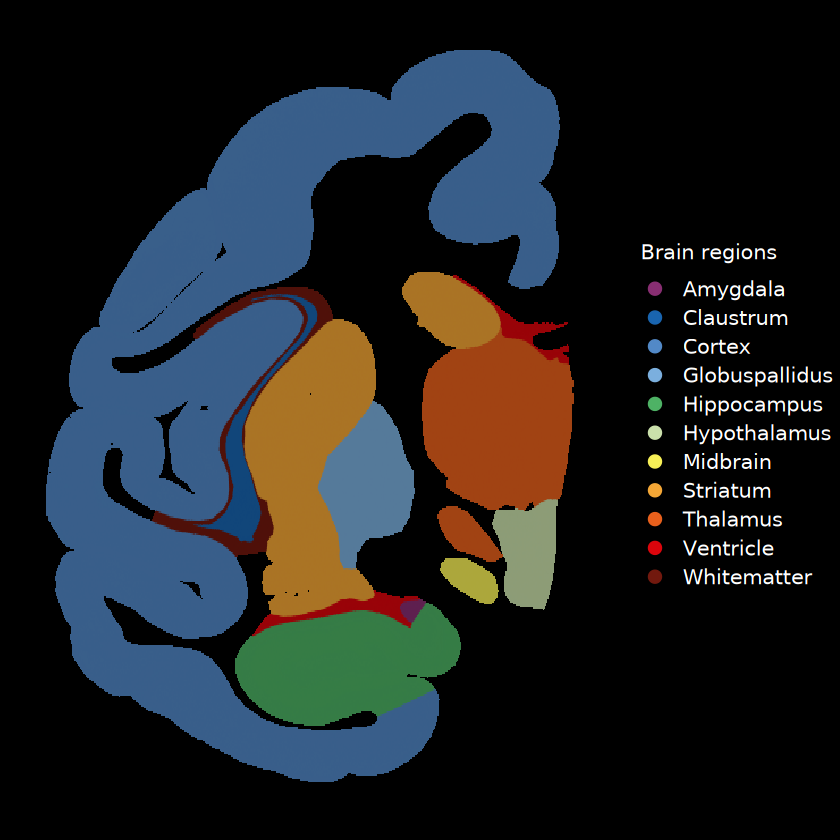

In [20]:
raster.dpi=c(512, 512)
playerno = ggplot() +
    scattermore::geom_scattermore(
      data = backpt,
      aes(x, y, color = subcortical),
      pixels = raster.dpi,
      pointsize = 0.7
    ) +
    # geom_point(data = refpos,
    #            aes(x, y, color = arealayer),size = 0.01) + 
    # geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid),
    #           color = "white") +
    scale_color_discreterainbow() +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Brain regions")) +
    theme_presentation() + scale_x_reverse()
playerno
ggexport(playerno,filename = "downstream_analysis/result/figure_revision/T47_annotation_brain_region_25_07_20.pdf",width = 7,height = 6)

file saved to downstream_analysis/result/figure_revision/T47_annotation_layer_25_07_20.pdf



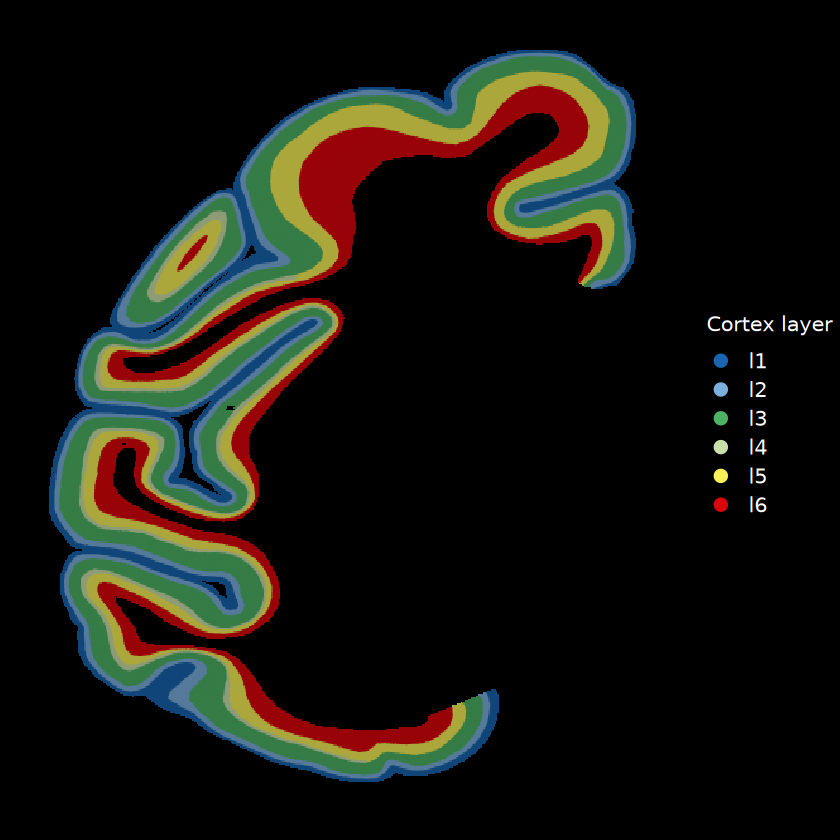

In [21]:
playerno = ggplot() +
    scattermore::geom_scattermore(
      data = backpt[backpt$subcortical == "Cortex",],
      aes(x, y, color = layer),
      pixels = raster.dpi,
      pointsize = 0.7
    ) +
    # geom_point(data = refpos,
    #            aes(x, y, color = arealayer),size = 0.01) + 
    # geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid),
    #           color = "white") +
    scale_color_discreterainbow() +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cortex layer")) +
    theme_presentation() + scale_x_reverse()
playerno
ggexport(playerno,filename = "downstream_analysis/result/figure_revision/T47_annotation_layer_25_07_20.pdf",width = 6,height = 6)

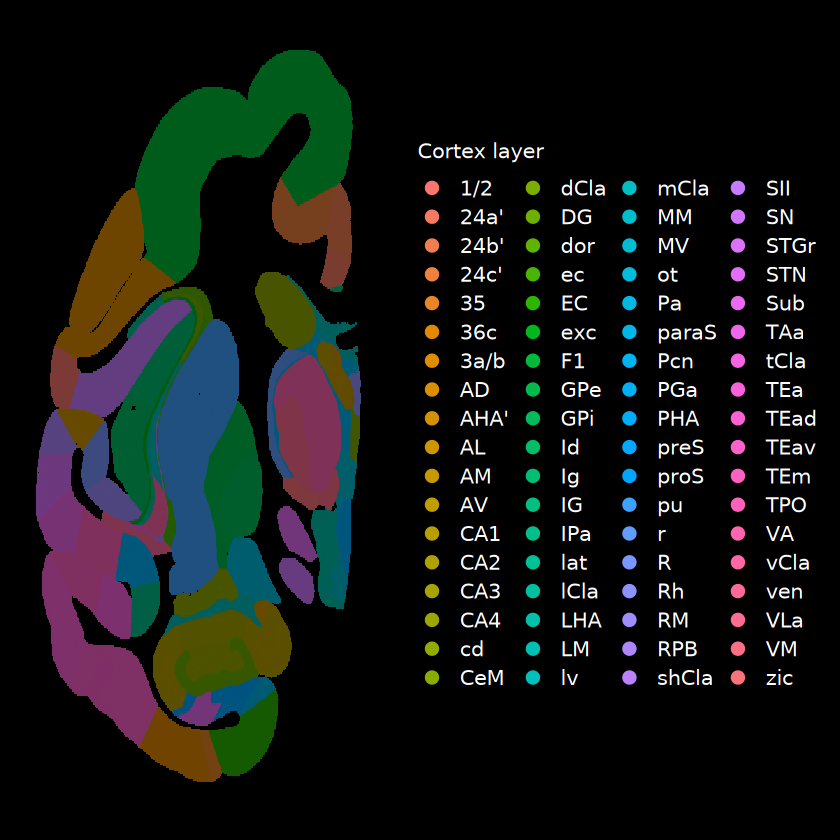

In [30]:
raster.dpi=c(512, 512)
pregionno = ggplot() +
    scattermore::geom_scattermore(
      data = backpt,
      aes(x, y, color = region),
      pixels = raster.dpi,
      pointsize = 0.5
    ) +
    # geom_point(data = refpos,
    #            aes(x, y, color = arealayer),size = 0.01) + 
    # geom_text(data = reflabel, aes(y = ymid, x = xmid, label= areaid),
    #           color = "white") +
    #scale_color_discreterainbow() +
    guides(color = guide_legend(override.aes = list(size=3),
                                title = "Cortex layer")) +
    theme_presentation() + scale_x_reverse()
pregionno

### DTU total evaluated

In [ ]:
#fsraw.cor = qread("downstream_analysis/data/reads_full_anotation/T47_main_data_read_total_annotation_delete_multiread_25_07_01.qs")

In [45]:
#isosigls = qread("downstream_analysis/data/dtu_analysis/T47_dtu_isoform_ls_fsraw_cor_25_07_01.qs")
isosigls_t44 = qread(file = "downstream_analysis/data/dtu_analysis/dtu_isoform_ls_fsraw_cor_25_10_10.qs")

In [46]:
#head(isosigi_t44)
sum(isosigls$layer$count)
sum(isosigls_t44$layer$count)

[1] 5100267

[1] 14202107

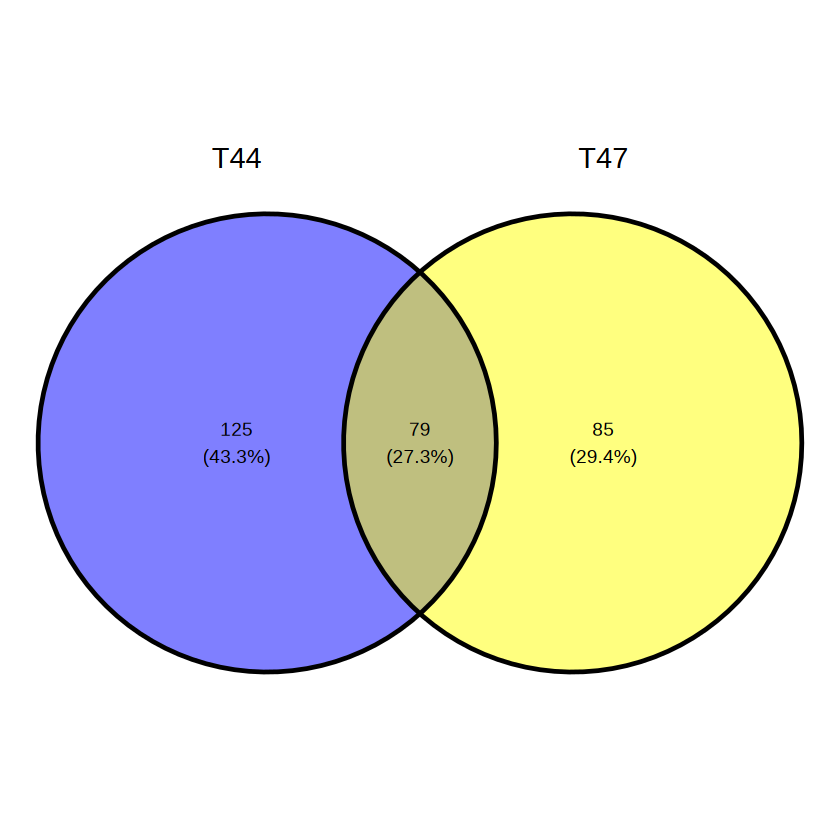

In [47]:
isosigi_t44 = isosigls_t44$subclass
isosigi_t47 = isosigls$subclass
hubg_t44 = unique(isosigi_t44[isosigi_t44$genecount > 10,]$gene_id)
hubg_t47 = unique(isosigi_t47[isosigi_t47$genecount > 10,]$gene_id)
commonid = intersect(hubg_t47,hubg_t44)
hubg_t44 = unique(isosigi_t44[isosigi_t44$sig != "N" & isosigi_t44$gene_id %in% commonid,]$gene_id)
hubg_t47 = unique(isosigi_t47[isosigi_t47$sig != "N" & isosigi_t47$gene_id %in% commonid,]$gene_id)
ggvenn::ggvenn(list("T44" = hubg_t44,"T47" = hubg_t47))
#intersect(hubg_t44,hubg_t47)

In [52]:
isosigi_t44 = isosigls_t44$layer
isosigi_t47 = isosigls$layer
isosigi_cmp = merge(isosigi_t44[,c(1,2,3,4,5,6,9,10)],isosigi_t47[,c(1,2,3,4,5,6,9,10)],by = c("gene_id","transcript_id","areatr"))
head(isosigi_cmp)

,gene_id,transcript_id,areatr,count.x,genecount.x,relative.x,dr.x,sig.x,count.y,genecount.y,relative.y,dr.y,sig.y
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,AACS,NM_001284010.1,l2,189,224,0.8437500,-0.041871540,N,28,33,0.8484848,0.01061901,N
2,AACS,NM_001284010.1,l3,1288,1450,0.8882759,0.011559495,N,80,110,0.7272727,-0.15099715,N
3,AACS,NM_001284010.1,l5,564,644,0.8757764,-0.003439863,N,56,63,0.8888889,0.06449106,N
4,AACS,NM_001284010.1,l6,493,560,0.8803571,0.002057032,N,35,39,0.8974359,0.07588708,N
5,AACS,XM_015430724.1,l2,35,224,0.1562500,0.041871540,N,5,33,0.1515152,-0.01061901,N
6,AACS,XM_015430724.1,l3,162,1450,0.1117241,-0.011559495,N,30,110,0.2727273,0.15099715,N


In [53]:
nrow(isosigi_cmp)
isosigi_cmpf = isosigi_cmp[isosigi_cmp$`count.y` > 30 & isosigi_cmp$`count.x` > 30 & isosigi_cmp$relative.y < 1 & isosigi_cmp$relative.x < 1,]
nrow(isosigi_cmpf)
cor(isosigi_cmpf$`relative.x`,isosigi_cmpf$`relative.y`)
cor(isosigi_cmpf$`count.x`,isosigi_cmpf$`count.y`)
cor(isosigi_cmpf$`genecount.x`,isosigi_cmpf$`genecount.y`)

[1] 15583

[1] 8068

[1] 0.6158781

[1] 0.7947948

[1] 0.8265103

file saved to downstream_analysis/result/figure_revision/T47_T44_compare_point_total_25_10_27.pdf



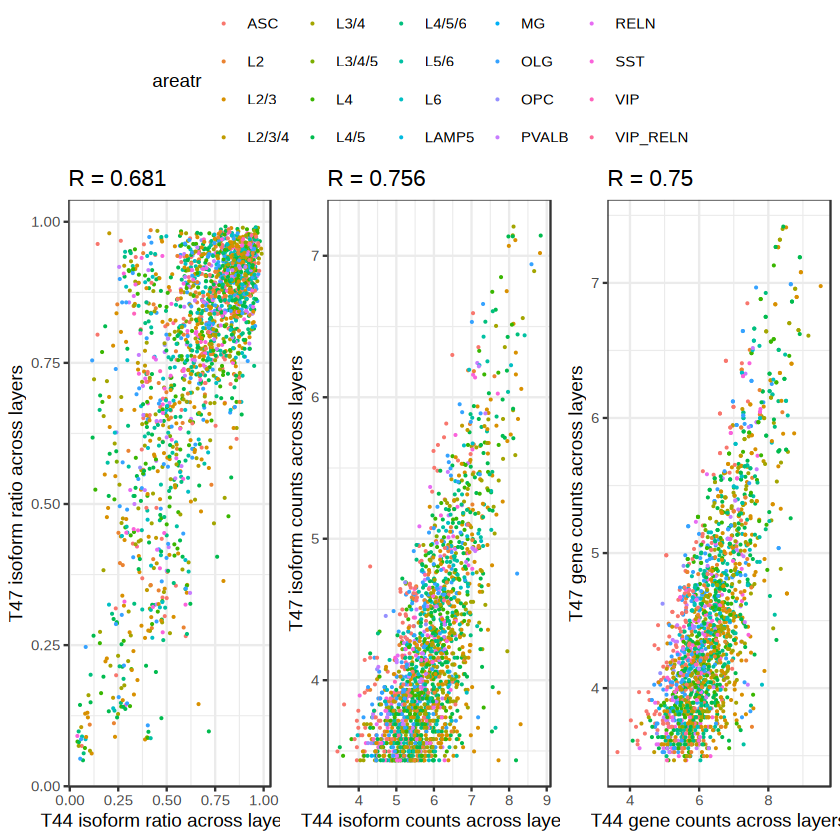

In [50]:
p2.1 = ggplot(isosigi_cmpf,aes(x = relative.x,y = relative.y,color = areatr))+ geom_point(size = 0.1) + theme_bw() + 
    xlab("T44 isoform ratio across layers") + ylab("T47 isoform ratio across layers") + 
    ggtitle(paste0("R = ",round(cor(isosigi_cmpf$`relative.x`,isosigi_cmpf$`relative.y`),3)))
p2.2 = ggplot(isosigi_cmpf,aes(x = log(count.x),y = log(count.y),color = areatr))+ geom_point(size = 0.1) + theme_bw() +
    xlab("T44 isoform counts across layers") + ylab("T47 isoform counts across layers") +
    ggtitle(paste0("R = ",round(cor(isosigi_cmpf$`count.x`,isosigi_cmpf$`count.y`),3)))
p2.3 = ggplot(isosigi_cmpf,aes(x = log(genecount.x),y = log(genecount.y),color = areatr))+ geom_point(size = 0.1) + theme_bw() +
    xlab("T44 gene counts across layers") + ylab("T47 gene counts across layers") +
    ggtitle(paste0("R = ",round(cor(isosigi_cmpf$`genecount.x`,isosigi_cmpf$`genecount.y`),3)))
p2 = ggarrange(p2.1,p2.2,p2.3,common.legend = T,nrow = 1)
p2
ggexport(p2,filename = "downstream_analysis/result/figure_revision/T47_T44_compare_point_total_25_10_27.pdf",width = 9,height = 4)

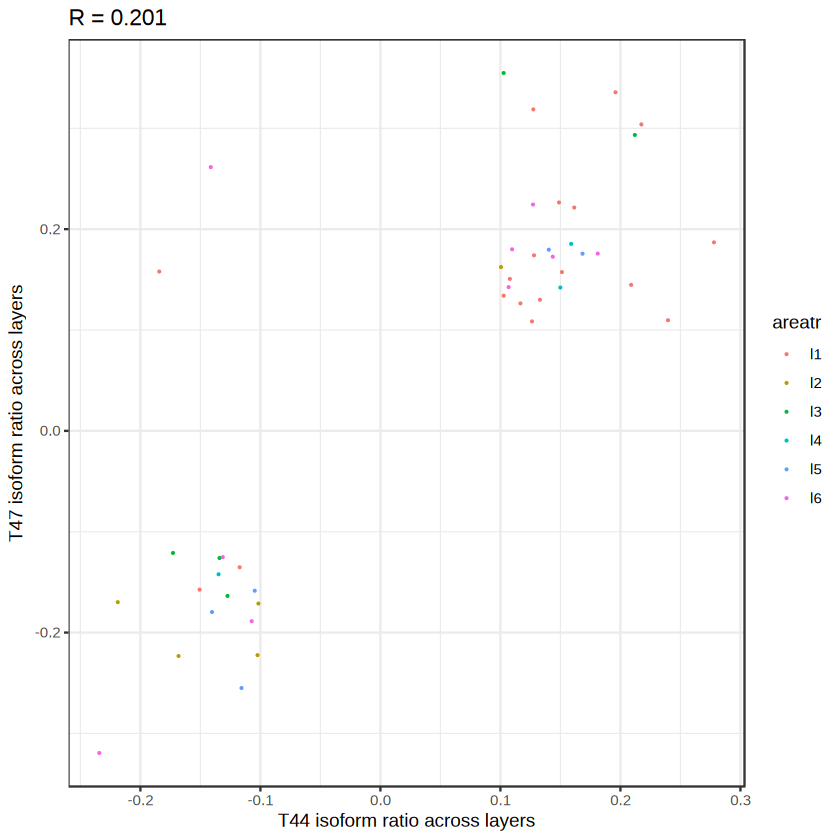

In [58]:
p2.4 = ggplot(isosigi_cmpf[isosigi_cmpf$sig.x != "N" & isosigi_cmpf$sig.y != "N",],aes(x = dr.x,y = dr.y,color = areatr)) + 
    geom_point(size = 0.1) + theme_bw() + 
    xlab("T44 isoform ratio across layers") + ylab("T47 isoform ratio across layers") + 
    ggtitle(paste0("R = ",round(cor(isosigi_cmpf$`dr.x`,isosigi_cmpf$`dr.y`),3)))

p2.4

In [56]:
isosigi_cmp[isosigi_cmp$gene_id == "DDRGK1",]

,gene_id,transcript_id,areatr,count.x,genecount.x,relative.x,dr.x,sig.x,count.y,genecount.y,relative.y,dr.y,sig.y
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
2896,DDRGK1,XM_005568473.2,l1,690,1787,0.3861220,-0.1193844,Down,356,984,0.3617886,-0.08879882,N
2897,DDRGK1,XM_005568473.2,l2,1437,4160,0.3454327,-0.1682115,Down,697,2791,0.2497313,-0.22326762,Down
2898,DDRGK1,XM_005568473.2,l3,5700,15246,0.3738686,-0.1340885,Down,1686,5098,0.3307179,-0.12608364,Down
2899,DDRGK1,XM_005568473.2,l4,1170,1893,0.6180666,0.1589491,Up,304,515,0.5902913,0.18540436,Up
2900,DDRGK1,XM_005568473.2,l5,1948,3112,0.6259640,0.1684260,Up,811,1393,0.5821967,0.17569088,Up
2901,DDRGK1,XM_005568473.2,l6,1929,3419,0.5642001,0.0943093,N,651,1302,0.5000000,0.07705484,N
